# INTEGRATE Timing Analysis Example

This example demonstrates how to perform comprehensive timing analysis of the INTEGRATE workflow
using the built-in timing_compute() and timing_plot() functions. 

The timing analysis benchmarks four main components:
1. Prior model generation (layered geological models)
2. Forward modeling using GA-AEM electromagnetic simulation  
3. Rejection sampling for Bayesian inversion
4. Posterior statistics computation

Results are automatically saved and comprehensive plots are generated showing:
- Performance scaling with dataset size and processor count
- Speedup analysis and parallel efficiency
- Comparisons with traditional least squares and MCMC methods
- Component-wise timing breakdowns

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
import time

# Check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

Notebook detected. Parallel processing is OK


## Quick Timing Test

This example runs a quick timing test with a small subset of dataset sizes 
and processor counts to demonstrate the timing functions.

In [3]:
print("# Running Quick Timing Test")
print("="*50)

# Define test parameters - small arrays for quick demonstration
N_arr_quick = [100, 1000, 10000]  # Small dataset sizes for quick test
Nproc_arr_quick = [1, 2, 4, 8]     # Limited processor counts

# Run timing computation
timing_file = ig.timing_compute(N_arr=N_arr_quick, Nproc_arr=Nproc_arr_quick)

print(f"\nTiming results saved to: {timing_file}")

# Running Quick Timing Test
Notebook detected. Parallel processing is OK
# TIMING TEST
Hostname (system): d52534 (Linux) 
Number of processors: 24
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex
Testing on 3 data sets of size(s): [100, 1000, 10000]
Testing on 4 sets of core(s): [1, 2, 4, 8]
Writing results to timing_d52534-Linux-24core_Nproc4_N3.npz 
TIMING: N=100, Ncpu=1, Ncpu_min=0


prior_layered:   0%|                                                                                                                            | 0/100 [00:00<?, ?it/s]

File PRIOR_CHI2_NF_5_log-uniform_N100.h5 does not exist.
Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                                                                                                                | 0/100 [00:00<?, ?it/s]

gatdaem1d:  64%|████████████████████████████████████████████████████████████████████████████▏                                          | 64/100 [00:01<00:00, 63.85it/s]

prior_data_gaaem: Time=  1.8s/100 soundings. 18.4ms/sounding, 54.5it/s


Rejection Sampling:   0%|                                                                                                                     | 0/11693 [00:00<?, ?it/s]

Rejection Sampling:  10%|██████████                                                                                             | 1149/11693 [00:00<00:00, 11489.02it/s]

Rejection Sampling:  20%|████████████████████▍                                                                                  | 2322/11693 [00:00<00:00, 11625.38it/s]

Rejection Sampling:  30%|██████████████████████████████▉                                                                        | 3507/11693 [00:00<00:00, 11723.74it/s]

Rejection Sampling:  40%|█████████████████████████████████████████▎                                                             | 4686/11693 [00:00<00:00, 11748.94it/s]

Rejection Sampling:  50%|███████████████████████████████████████████████████▋                                                   | 5861/11693 [00:00<00:00, 11707.11it/s]

Rejection Sampling:  60%|██████████████████████████████████████████████████████████████                                         | 7051/11693 [00:00<00:00, 11770.21it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████▋                              | 8245/11693 [00:00<00:00, 11824.91it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████                    | 9428/11693 [00:00<00:00, 11749.67it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████▌         | 10604/11693 [00:00<00:00, 11636.83it/s]

integrate_rejection: Time=  1.0s/11693 soundings,  0.1ms/sounding, 11573.6it/s. T_av=2437.2, EV_av=-727.3


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  37%|████████████████████████████████████████▍                                                                    | 4342/11693 [00:01<00:01, 4341.83it/s]

M1-continuous:  75%|█████████████████████████████████████████████████████████████████████████████████▍                           | 8732/11693 [00:02<00:00, 4370.01it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  59%|████████████████████████████████████████████████████████████████▌                                            | 6928/11693 [00:01<00:00, 6927.42it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=1000, Ncpu=1, Ncpu_min=0


prior_layered:   0%|                                                                                                                           | 0/1000 [00:00<?, ?it/s]

File PRIOR_CHI2_NF_5_log-uniform_N1000.h5 does not exist.
Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                                                                                                               | 0/1000 [00:00<?, ?it/s]

gatdaem1d:   6%|███████▋                                                                                                              | 65/1000 [00:01<00:14, 64.08it/s]

gatdaem1d:  13%|███████████████▎                                                                                                     | 131/1000 [00:02<00:13, 65.03it/s]

gatdaem1d:  20%|███████████████████████                                                                                              | 197/1000 [00:03<00:12, 64.10it/s]

gatdaem1d:  26%|██████████████████████████████▋                                                                                      | 262/1000 [00:04<00:11, 64.01it/s]

gatdaem1d:  33%|██████████████████████████████████████▎                                                                              | 327/1000 [00:05<00:10, 64.14it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▉                                                                       | 393/1000 [00:06<00:09, 64.66it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▌                                                               | 458/1000 [00:07<00:08, 64.17it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▎                                                       | 524/1000 [00:08<00:07, 64.54it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▉                                                | 589/1000 [00:09<00:06, 64.12it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▋                                        | 655/1000 [00:10<00:05, 64.58it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 720/1000 [00:11<00:04, 64.34it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 785/1000 [00:12<00:03, 64.18it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 850/1000 [00:13<00:02, 63.92it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 914/1000 [00:14<00:01, 63.61it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 978/1000 [00:15<00:00, 63.24it/s]

prior_data_gaaem: Time= 15.9s/1000 soundings. 15.9ms/sounding, 62.9it/s


Rejection Sampling:   0%|                                                                                                                     | 0/11693 [00:00<?, ?it/s]

Rejection Sampling:   4%|████▏                                                                                                    | 472/11693 [00:00<00:02, 4718.53it/s]

Rejection Sampling:   8%|████████▍                                                                                                | 944/11693 [00:00<00:02, 4716.87it/s]

Rejection Sampling:  12%|████████████▋                                                                                           | 1420/11693 [00:00<00:02, 4732.52it/s]

Rejection Sampling:  16%|████████████████▉                                                                                       | 1898/11693 [00:00<00:02, 4751.00it/s]

Rejection Sampling:  20%|█████████████████████                                                                                   | 2374/11693 [00:00<00:01, 4753.00it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                              | 2857/11693 [00:00<00:01, 4778.32it/s]

Rejection Sampling:  29%|█████████████████████████████▋                                                                          | 3336/11693 [00:00<00:01, 4782.09it/s]

Rejection Sampling:  33%|██████████████████████████████████                                                                      | 3823/11693 [00:00<00:01, 4809.77it/s]

Rejection Sampling:  37%|██████████████████████████████████████▍                                                                 | 4319/11693 [00:00<00:01, 4854.27it/s]

Rejection Sampling:  41%|██████████████████████████████████████████▊                                                             | 4817/11693 [00:01<00:01, 4890.57it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▏                                                        | 5307/11693 [00:01<00:01, 4846.37it/s]

Rejection Sampling:  50%|███████████████████████████████████████████████████▋                                                    | 5810/11693 [00:01<00:01, 4901.64it/s]

Rejection Sampling:  54%|████████████████████████████████████████████████████████▎                                               | 6333/11693 [00:01<00:01, 5000.02it/s]

Rejection Sampling:  59%|████████████████████████████████████████████████████████████▉                                           | 6854/11693 [00:01<00:00, 5060.27it/s]

Rejection Sampling:  63%|█████████████████████████████████████████████████████████████████▋                                      | 7380/11693 [00:01<00:00, 5117.79it/s]

Rejection Sampling:  68%|██████████████████████████████████████████████████████████████████████▏                                 | 7897/11693 [00:01<00:00, 5131.67it/s]

Rejection Sampling:  72%|██████████████████████████████████████████████████████████████████████████▉                             | 8423/11693 [00:01<00:00, 5169.78it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████████████████████████████████████▌                        | 8951/11693 [00:01<00:00, 5201.86it/s]

Rejection Sampling:  81%|████████████████████████████████████████████████████████████████████████████████████▎                   | 9479/11693 [00:01<00:00, 5224.40it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████               | 10002/11693 [00:02<00:00, 5207.39it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████▋          | 10523/11693 [00:02<00:00, 5060.72it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████▏     | 11030/11693 [00:02<00:00, 5007.33it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 11532/11693 [00:02<00:00, 4989.93it/s]

integrate_rejection: Time=  2.4s/11693 soundings,  0.2ms/sounding, 4936.4it/s. T_av=349.5, EV_av=-242.1


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  35%|██████████████████████████████████████                                                                       | 4087/11693 [00:01<00:01, 4086.03it/s]

M1-continuous:  70%|████████████████████████████████████████████████████████████████████████████▍                                | 8201/11693 [00:02<00:00, 4102.40it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  48%|████████████████████████████████████████████████████▊                                                        | 5664/11693 [00:01<00:01, 5663.33it/s]

M2-continuous:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 11430/11693 [00:02<00:00, 5723.29it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=10000, Ncpu=1, Ncpu_min=1


prior_layered:   0%|                                                                                                                          | 0/10000 [00:00<?, ?it/s]

File PRIOR_CHI2_NF_5_log-uniform_N10000.h5 does not exist.


Using file_basename=TX07_20231016_2x4_RC20-33


prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                                                                                                              | 0/10000 [00:00<?, ?it/s]

gatdaem1d:   1%|▋                                                                                                                    | 64/10000 [00:01<02:35, 63.96it/s]

gatdaem1d:   1%|█▌                                                                                                                  | 130/10000 [00:02<02:31, 65.07it/s]

gatdaem1d:   2%|██▎                                                                                                                 | 196/10000 [00:03<02:31, 64.87it/s]

gatdaem1d:   3%|███                                                                                                                 | 261/10000 [00:04<02:30, 64.55it/s]

gatdaem1d:   3%|███▊                                                                                                                | 328/10000 [00:05<02:28, 65.25it/s]

gatdaem1d:   4%|████▌                                                                                                               | 394/10000 [00:06<02:27, 64.92it/s]

gatdaem1d:   5%|█████▎                                                                                                              | 460/10000 [00:07<02:26, 65.04it/s]

gatdaem1d:   5%|██████                                                                                                              | 526/10000 [00:08<02:25, 65.06it/s]

gatdaem1d:   6%|██████▊                                                                                                             | 592/10000 [00:09<02:24, 65.14it/s]

gatdaem1d:   7%|███████▋                                                                                                            | 658/10000 [00:10<02:23, 65.30it/s]

gatdaem1d:   7%|████████▍                                                                                                           | 724/10000 [00:11<02:22, 64.98it/s]

gatdaem1d:   8%|█████████▏                                                                                                          | 791/10000 [00:12<02:21, 65.26it/s]

gatdaem1d:   9%|█████████▉                                                                                                          | 857/10000 [00:13<02:20, 65.22it/s]

gatdaem1d:   9%|██████████▋                                                                                                         | 923/10000 [00:14<02:19, 65.30it/s]

gatdaem1d:  10%|███████████▍                                                                                                        | 989/10000 [00:15<02:18, 65.24it/s]

gatdaem1d:  11%|████████████▏                                                                                                      | 1055/10000 [00:16<02:17, 64.99it/s]

gatdaem1d:  11%|████████████▉                                                                                                      | 1121/10000 [00:17<02:16, 65.18it/s]

gatdaem1d:  12%|█████████████▋                                                                                                     | 1187/10000 [00:18<02:15, 65.18it/s]

gatdaem1d:  13%|██████████████▍                                                                                                    | 1253/10000 [00:19<02:14, 65.25it/s]

gatdaem1d:  13%|███████████████▏                                                                                                   | 1319/10000 [00:20<02:13, 64.89it/s]

gatdaem1d:  14%|███████████████▉                                                                                                   | 1385/10000 [00:21<02:12, 65.14it/s]

gatdaem1d:  15%|████████████████▋                                                                                                  | 1451/10000 [00:22<02:11, 65.22it/s]

gatdaem1d:  15%|█████████████████▍                                                                                                 | 1517/10000 [00:23<02:09, 65.29it/s]

gatdaem1d:  16%|██████████████████▏                                                                                                | 1583/10000 [00:24<02:10, 64.73it/s]

gatdaem1d:  16%|██████████████████▉                                                                                                | 1648/10000 [00:25<02:08, 64.74it/s]

gatdaem1d:  17%|███████████████████▋                                                                                               | 1713/10000 [00:26<02:08, 64.74it/s]

gatdaem1d:  18%|████████████████████▍                                                                                              | 1779/10000 [00:27<02:06, 64.96it/s]

gatdaem1d:  18%|█████████████████████▏                                                                                             | 1844/10000 [00:28<02:05, 64.92it/s]

gatdaem1d:  19%|█████████████████████▉                                                                                             | 1909/10000 [00:29<02:06, 64.17it/s]

gatdaem1d:  20%|██████████████████████▋                                                                                            | 1976/10000 [00:30<02:03, 64.86it/s]

gatdaem1d:  20%|███████████████████████▍                                                                                           | 2043/10000 [00:31<02:01, 65.28it/s]

gatdaem1d:  21%|████████████████████████▎                                                                                          | 2109/10000 [00:32<02:01, 64.90it/s]

gatdaem1d:  22%|█████████████████████████                                                                                          | 2174/10000 [00:33<02:01, 64.48it/s]

gatdaem1d:  22%|█████████████████████████▋                                                                                         | 2239/10000 [00:34<02:01, 63.94it/s]

gatdaem1d:  23%|██████████████████████████▍                                                                                        | 2304/10000 [00:35<02:00, 64.01it/s]

gatdaem1d:  24%|███████████████████████████▏                                                                                       | 2369/10000 [00:36<01:59, 63.98it/s]

gatdaem1d:  24%|███████████████████████████▉                                                                                       | 2433/10000 [00:37<01:58, 63.70it/s]

gatdaem1d:  25%|████████████████████████████▋                                                                                      | 2498/10000 [00:38<01:57, 64.04it/s]

gatdaem1d:  26%|█████████████████████████████▍                                                                                     | 2564/10000 [00:39<01:55, 64.41it/s]

gatdaem1d:  26%|██████████████████████████████▏                                                                                    | 2629/10000 [00:40<01:55, 64.03it/s]

gatdaem1d:  27%|██████████████████████████████▉                                                                                    | 2694/10000 [00:41<01:54, 63.94it/s]

gatdaem1d:  28%|███████████████████████████████▋                                                                                   | 2760/10000 [00:42<01:52, 64.27it/s]

gatdaem1d:  28%|████████████████████████████████▌                                                                                  | 2827/10000 [00:43<01:50, 64.84it/s]

gatdaem1d:  29%|█████████████████████████████████▎                                                                                 | 2894/10000 [00:44<01:49, 65.19it/s]

gatdaem1d:  30%|██████████████████████████████████                                                                                 | 2960/10000 [00:45<01:48, 64.81it/s]

gatdaem1d:  30%|██████████████████████████████████▊                                                                                | 3025/10000 [00:46<01:48, 64.45it/s]

gatdaem1d:  31%|███████████████████████████████████▌                                                                               | 3090/10000 [00:47<01:47, 64.11it/s]

gatdaem1d:  32%|████████████████████████████████████▎                                                                              | 3156/10000 [00:48<01:45, 64.61it/s]

gatdaem1d:  32%|█████████████████████████████████████                                                                              | 3221/10000 [00:49<01:45, 64.34it/s]

gatdaem1d:  33%|█████████████████████████████████████▊                                                                             | 3286/10000 [00:50<01:44, 64.39it/s]

gatdaem1d:  34%|██████████████████████████████████████▌                                                                            | 3351/10000 [00:51<01:43, 64.03it/s]

gatdaem1d:  34%|███████████████████████████████████████▎                                                                           | 3416/10000 [00:52<01:43, 63.84it/s]

gatdaem1d:  35%|████████████████████████████████████████                                                                           | 3482/10000 [00:53<01:41, 64.35it/s]

gatdaem1d:  35%|████████████████████████████████████████▊                                                                          | 3547/10000 [00:54<01:40, 64.01it/s]

gatdaem1d:  36%|█████████████████████████████████████████▌                                                                         | 3612/10000 [00:55<01:39, 63.91it/s]

gatdaem1d:  37%|██████████████████████████████████████████▎                                                                        | 3676/10000 [00:56<01:39, 63.32it/s]

gatdaem1d:  37%|███████████████████████████████████████████                                                                        | 3743/10000 [00:57<01:37, 64.14it/s]

gatdaem1d:  38%|███████████████████████████████████████████▊                                                                       | 3809/10000 [00:58<01:35, 64.52it/s]

gatdaem1d:  39%|████████████████████████████████████████████▌                                                                      | 3874/10000 [00:59<01:35, 64.30it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▎                                                                     | 3939/10000 [01:00<01:34, 64.44it/s]

gatdaem1d:  40%|██████████████████████████████████████████████                                                                     | 4004/10000 [01:01<01:32, 64.51it/s]

gatdaem1d:  41%|██████████████████████████████████████████████▊                                                                    | 4069/10000 [01:02<01:31, 64.54it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▌                                                                   | 4134/10000 [01:03<01:30, 64.65it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▎                                                                  | 4200/10000 [01:04<01:29, 64.99it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████                                                                  | 4265/10000 [01:05<01:28, 64.83it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████▊                                                                 | 4330/10000 [01:07<01:28, 64.39it/s]

gatdaem1d:  44%|██████████████████████████████████████████████████▌                                                                | 4395/10000 [01:08<01:27, 64.13it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████▎                                                               | 4460/10000 [01:09<01:26, 64.34it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████                                                               | 4525/10000 [01:10<01:24, 64.45it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████▊                                                              | 4592/10000 [01:11<01:23, 65.12it/s]

gatdaem1d:  47%|█████████████████████████████████████████████████████▌                                                             | 4658/10000 [01:12<01:21, 65.20it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▎                                                            | 4724/10000 [01:13<01:21, 64.82it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████                                                            | 4790/10000 [01:14<01:20, 64.90it/s]

gatdaem1d:  49%|███████████████████████████████████████████████████████▊                                                           | 4857/10000 [01:15<01:18, 65.30it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████▌                                                          | 4923/10000 [01:16<01:18, 64.78it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████▎                                                         | 4989/10000 [01:17<01:17, 64.86it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████                                                         | 5054/10000 [01:18<01:16, 64.51it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████▊                                                        | 5119/10000 [01:19<01:15, 64.56it/s]

gatdaem1d:  52%|███████████████████████████████████████████████████████████▌                                                       | 5184/10000 [01:20<01:14, 64.42it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▍                                                      | 5250/10000 [01:21<01:13, 64.62it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▏                                                     | 5317/10000 [01:22<01:11, 65.20it/s]

gatdaem1d:  54%|█████████████████████████████████████████████████████████████▉                                                     | 5383/10000 [01:23<01:10, 65.43it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▋                                                    | 5449/10000 [01:24<01:09, 65.04it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▍                                                   | 5515/10000 [01:25<01:09, 64.49it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████▏                                                  | 5581/10000 [01:26<01:08, 64.69it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████▉                                                  | 5646/10000 [01:27<01:08, 63.98it/s]

gatdaem1d:  57%|█████████████████████████████████████████████████████████████████▋                                                 | 5711/10000 [01:28<01:06, 64.02it/s]

gatdaem1d:  58%|██████████████████████████████████████████████████████████████████▍                                                | 5776/10000 [01:29<01:05, 64.26it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▏                                               | 5841/10000 [01:30<01:04, 64.26it/s]

gatdaem1d:  59%|███████████████████████████████████████████████████████████████████▉                                               | 5906/10000 [01:31<01:03, 64.42it/s]

gatdaem1d:  60%|████████████████████████████████████████████████████████████████████▋                                              | 5972/10000 [01:32<01:02, 64.76it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▍                                             | 6037/10000 [01:33<01:01, 64.55it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▏                                            | 6102/10000 [01:34<01:00, 64.39it/s]

gatdaem1d:  62%|██████████████████████████████████████████████████████████████████████▉                                            | 6168/10000 [01:35<00:59, 64.57it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████▋                                           | 6234/10000 [01:36<00:58, 64.84it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████▍                                          | 6300/10000 [01:37<00:56, 65.02it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████▏                                         | 6366/10000 [01:38<00:56, 64.65it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████▉                                         | 6431/10000 [01:39<00:55, 63.97it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████▋                                        | 6497/10000 [01:40<00:54, 64.36it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████▍                                       | 6562/10000 [01:41<00:53, 64.26it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▏                                      | 6627/10000 [01:42<00:52, 64.04it/s]

gatdaem1d:  67%|████████████████████████████████████████████████████████████████████████████▉                                      | 6692/10000 [01:43<00:51, 64.08it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████████████████████████████████▋                                     | 6758/10000 [01:44<00:50, 64.47it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▍                                    | 6823/10000 [01:45<00:49, 64.46it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▏                                   | 6888/10000 [01:46<00:48, 64.24it/s]

gatdaem1d:  70%|███████████████████████████████████████████████████████████████████████████████▉                                   | 6953/10000 [01:47<00:47, 63.84it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▋                                  | 7018/10000 [01:48<00:46, 63.91it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████▍                                 | 7083/10000 [01:49<00:45, 64.00it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████▏                                | 7150/10000 [01:50<00:44, 64.57it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████████████████████████████████████▉                                | 7216/10000 [01:51<00:43, 64.72it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 7282/10000 [01:52<00:41, 65.00it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▌                              | 7348/10000 [01:53<00:40, 64.85it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▏                             | 7413/10000 [01:54<00:40, 64.36it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████████████████████████████████████▉                             | 7478/10000 [01:55<00:39, 63.55it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▋                            | 7542/10000 [01:56<00:38, 63.41it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▍                           | 7608/10000 [01:57<00:37, 64.02it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████▏                          | 7673/10000 [01:58<00:36, 63.73it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████▉                          | 7739/10000 [01:59<00:35, 64.33it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████▋                         | 7804/10000 [02:00<00:34, 64.21it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████████████████████████████████████████▍                        | 7869/10000 [02:01<00:33, 64.01it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▏                       | 7934/10000 [02:02<00:32, 64.19it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 8000/10000 [02:03<00:30, 64.52it/s]

gatdaem1d:  81%|████████████████████████████████████████████████████████████████████████████████████████████▋                      | 8065/10000 [02:04<00:30, 64.42it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                     | 8130/10000 [02:05<00:29, 64.41it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▏                    | 8195/10000 [02:06<00:28, 64.23it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████████████████████████████████████████▉                    | 8260/10000 [02:07<00:27, 64.29it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                   | 8326/10000 [02:08<00:25, 64.56it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 8391/10000 [02:10<00:24, 64.48it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 8456/10000 [02:11<00:24, 64.16it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████                 | 8522/10000 [02:12<00:22, 64.65it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                | 8587/10000 [02:13<00:21, 64.23it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████▍               | 8652/10000 [02:14<00:20, 64.42it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 8718/10000 [02:15<00:19, 64.84it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████              | 8783/10000 [02:16<00:18, 64.39it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 8848/10000 [02:17<00:17, 64.19it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 8914/10000 [02:18<00:16, 64.66it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 8979/10000 [02:19<00:15, 64.36it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████           | 9044/10000 [02:20<00:14, 64.19it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 9109/10000 [02:21<00:13, 64.08it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 9175/10000 [02:22<00:12, 64.41it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 9240/10000 [02:23<00:11, 64.11it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 9305/10000 [02:24<00:10, 64.07it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 9370/10000 [02:25<00:09, 64.07it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 9435/10000 [02:26<00:08, 64.22it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 9500/10000 [02:27<00:07, 64.18it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 9565/10000 [02:28<00:06, 64.05it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 9632/10000 [02:29<00:05, 64.69it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 9697/10000 [02:30<00:04, 64.42it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 9762/10000 [02:31<00:03, 64.47it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 9827/10000 [02:32<00:02, 64.18it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 9892/10000 [02:33<00:01, 63.95it/s]

gatdaem1d: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 9958/10000 [02:34<00:00, 64.33it/s]

prior_data_gaaem: Time=155.3s/10000 soundings. 15.5ms/sounding, 64.4it/s


Rejection Sampling:   0%|                                                                                                                     | 0/11693 [00:00<?, ?it/s]

Rejection Sampling:   1%|▋                                                                                                          | 76/11693 [00:00<00:15, 756.09it/s]

Rejection Sampling:   1%|█▍                                                                                                        | 160/11693 [00:00<00:14, 800.25it/s]

Rejection Sampling:   2%|██▏                                                                                                       | 241/11693 [00:00<00:14, 769.51it/s]

Rejection Sampling:   3%|██▉                                                                                                       | 320/11693 [00:00<00:14, 774.34it/s]

Rejection Sampling:   3%|███▌                                                                                                      | 398/11693 [00:00<00:14, 766.07it/s]

Rejection Sampling:   4%|████▎                                                                                                     | 475/11693 [00:00<00:14, 763.08it/s]

Rejection Sampling:   5%|█████                                                                                                     | 559/11693 [00:00<00:14, 785.15it/s]

Rejection Sampling:   5%|█████▊                                                                                                    | 638/11693 [00:00<00:14, 776.57it/s]

Rejection Sampling:   6%|██████▍                                                                                                   | 716/11693 [00:00<00:14, 772.09it/s]

Rejection Sampling:   7%|███████▏                                                                                                  | 794/11693 [00:01<00:14, 768.16it/s]

Rejection Sampling:   8%|███████▉                                                                                                  | 877/11693 [00:01<00:13, 783.90it/s]

Rejection Sampling:   8%|████████▋                                                                                                 | 960/11693 [00:01<00:13, 795.96it/s]

Rejection Sampling:   9%|█████████▎                                                                                               | 1043/11693 [00:01<00:13, 805.51it/s]

Rejection Sampling:  10%|██████████                                                                                               | 1125/11693 [00:01<00:13, 809.24it/s]

Rejection Sampling:  10%|██████████▊                                                                                              | 1209/11693 [00:01<00:12, 816.96it/s]

Rejection Sampling:  11%|███████████▌                                                                                             | 1292/11693 [00:01<00:12, 820.46it/s]

Rejection Sampling:  12%|████████████▎                                                                                            | 1378/11693 [00:01<00:12, 831.94it/s]

Rejection Sampling:  13%|█████████████▏                                                                                           | 1463/11693 [00:01<00:12, 835.82it/s]

Rejection Sampling:  13%|█████████████▉                                                                                           | 1547/11693 [00:01<00:12, 835.17it/s]

Rejection Sampling:  14%|██████████████▋                                                                                          | 1631/11693 [00:02<00:12, 833.20it/s]

Rejection Sampling:  15%|███████████████▍                                                                                         | 1717/11693 [00:02<00:11, 838.62it/s]

Rejection Sampling:  15%|████████████████▏                                                                                        | 1801/11693 [00:02<00:11, 837.81it/s]

Rejection Sampling:  16%|████████████████▉                                                                                        | 1885/11693 [00:02<00:11, 835.83it/s]

Rejection Sampling:  17%|█████████████████▋                                                                                       | 1971/11693 [00:02<00:11, 840.73it/s]

Rejection Sampling:  18%|██████████████████▍                                                                                      | 2057/11693 [00:02<00:11, 845.19it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                     | 2142/11693 [00:02<00:11, 843.86it/s]

Rejection Sampling:  19%|███████████████████▉                                                                                     | 2227/11693 [00:02<00:11, 839.38it/s]

Rejection Sampling:  20%|████████████████████▊                                                                                    | 2311/11693 [00:02<00:11, 837.76it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                   | 2395/11693 [00:02<00:11, 837.53it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                  | 2482/11693 [00:03<00:10, 844.76it/s]

Rejection Sampling:  22%|███████████████████████                                                                                  | 2567/11693 [00:03<00:10, 836.95it/s]

Rejection Sampling:  23%|███████████████████████▊                                                                                 | 2652/11693 [00:03<00:10, 840.01it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                | 2737/11693 [00:03<00:10, 836.72it/s]

Rejection Sampling:  24%|█████████████████████████▎                                                                               | 2821/11693 [00:03<00:10, 837.35it/s]

Rejection Sampling:  25%|██████████████████████████                                                                               | 2908/11693 [00:03<00:10, 845.97it/s]

Rejection Sampling:  26%|██████████████████████████▉                                                                              | 2994/11693 [00:03<00:10, 847.47it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                             | 3082/11693 [00:03<00:10, 856.06it/s]

Rejection Sampling:  27%|████████████████████████████▍                                                                            | 3168/11693 [00:03<00:10, 847.47it/s]

Rejection Sampling:  28%|█████████████████████████████▏                                                                           | 3254/11693 [00:03<00:09, 850.17it/s]

Rejection Sampling:  29%|█████████████████████████████▉                                                                           | 3340/11693 [00:04<00:09, 846.94it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                          | 3425/11693 [00:04<00:09, 834.42it/s]

Rejection Sampling:  30%|███████████████████████████████▌                                                                         | 3509/11693 [00:04<00:10, 798.85it/s]

Rejection Sampling:  31%|████████████████████████████████▏                                                                        | 3590/11693 [00:04<00:10, 787.97it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                        | 3670/11693 [00:04<00:10, 777.03it/s]

Rejection Sampling:  32%|█████████████████████████████████▋                                                                       | 3748/11693 [00:04<00:10, 765.03it/s]

Rejection Sampling:  33%|██████████████████████████████████▎                                                                      | 3825/11693 [00:04<00:10, 757.55it/s]

Rejection Sampling:  33%|███████████████████████████████████                                                                      | 3901/11693 [00:04<00:10, 757.08it/s]

Rejection Sampling:  34%|███████████████████████████████████▋                                                                     | 3977/11693 [00:04<00:10, 750.58it/s]

Rejection Sampling:  35%|████████████████████████████████████▍                                                                    | 4053/11693 [00:05<00:10, 751.54it/s]

Rejection Sampling:  35%|█████████████████████████████████████                                                                    | 4129/11693 [00:05<00:10, 753.95it/s]

Rejection Sampling:  36%|█████████████████████████████████████▊                                                                   | 4216/11693 [00:05<00:09, 786.62it/s]

Rejection Sampling:  37%|██████████████████████████████████████▌                                                                  | 4295/11693 [00:05<00:09, 774.01it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                 | 4374/11693 [00:05<00:09, 776.85it/s]

Rejection Sampling:  38%|████████████████████████████████████████                                                                 | 4459/11693 [00:05<00:09, 795.63it/s]

Rejection Sampling:  39%|████████████████████████████████████████▊                                                                | 4544/11693 [00:05<00:08, 811.58it/s]

Rejection Sampling:  40%|█████████████████████████████████████████▌                                                               | 4629/11693 [00:05<00:08, 821.80it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                              | 4714/11693 [00:05<00:08, 829.43it/s]

Rejection Sampling:  41%|███████████████████████████████████████████                                                              | 4799/11693 [00:05<00:08, 834.69it/s]

Rejection Sampling:  42%|███████████████████████████████████████████▊                                                             | 4884/11693 [00:06<00:08, 837.26it/s]

Rejection Sampling:  43%|████████████████████████████████████████████▋                                                            | 4971/11693 [00:06<00:07, 845.14it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▍                                                           | 5058/11693 [00:06<00:07, 850.42it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▏                                                          | 5144/11693 [00:06<00:07, 845.53it/s]

Rejection Sampling:  45%|██████████████████████████████████████████████▉                                                          | 5229/11693 [00:06<00:07, 845.95it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                         | 5314/11693 [00:06<00:07, 839.91it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▍                                                        | 5399/11693 [00:06<00:07, 837.06it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▏                                                       | 5483/11693 [00:06<00:07, 801.23it/s]

Rejection Sampling:  48%|█████████████████████████████████████████████████▉                                                       | 5564/11693 [00:06<00:07, 784.13it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▋                                                      | 5643/11693 [00:06<00:07, 771.19it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▍                                                     | 5727/11693 [00:07<00:07, 790.15it/s]

Rejection Sampling:  50%|████████████████████████████████████████████████████▏                                                    | 5810/11693 [00:07<00:07, 800.03it/s]

Rejection Sampling:  50%|████████████████████████████████████████████████████▉                                                    | 5894/11693 [00:07<00:07, 810.29it/s]

Rejection Sampling:  51%|█████████████████████████████████████████████████████▋                                                   | 5977/11693 [00:07<00:07, 815.92it/s]

Rejection Sampling:  52%|██████████████████████████████████████████████████████▍                                                  | 6061/11693 [00:07<00:06, 821.83it/s]

Rejection Sampling:  53%|███████████████████████████████████████████████████████▏                                                 | 6147/11693 [00:07<00:06, 830.81it/s]

Rejection Sampling:  53%|███████████████████████████████████████████████████████▉                                                 | 6231/11693 [00:07<00:06, 828.00it/s]

Rejection Sampling:  54%|████████████████████████████████████████████████████████▋                                                | 6315/11693 [00:07<00:06, 830.93it/s]

Rejection Sampling:  55%|█████████████████████████████████████████████████████████▍                                               | 6400/11693 [00:07<00:06, 835.04it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▏                                              | 6485/11693 [00:07<00:06, 837.01it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████                                              | 6572/11693 [00:08<00:06, 846.09it/s]

Rejection Sampling:  57%|███████████████████████████████████████████████████████████▊                                             | 6659/11693 [00:08<00:05, 851.13it/s]

Rejection Sampling:  58%|████████████████████████████████████████████████████████████▌                                            | 6745/11693 [00:08<00:05, 849.80it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▎                                           | 6830/11693 [00:08<00:05, 848.50it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████                                           | 6915/11693 [00:08<00:05, 845.72it/s]

Rejection Sampling:  60%|██████████████████████████████████████████████████████████████▊                                          | 7000/11693 [00:08<00:05, 844.32it/s]

Rejection Sampling:  61%|███████████████████████████████████████████████████████████████▌                                         | 7085/11693 [00:08<00:05, 839.04it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▍                                        | 7169/11693 [00:08<00:05, 836.09it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▏                                       | 7253/11693 [00:08<00:05, 836.09it/s]

Rejection Sampling:  63%|█████████████████████████████████████████████████████████████████▉                                       | 7337/11693 [00:08<00:05, 835.59it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▋                                      | 7421/11693 [00:09<00:05, 805.82it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▍                                     | 7504/11693 [00:09<00:05, 812.56it/s]

Rejection Sampling:  65%|████████████████████████████████████████████████████████████████████▏                                    | 7587/11693 [00:09<00:05, 816.59it/s]

Rejection Sampling:  66%|████████████████████████████████████████████████████████████████████▊                                    | 7670/11693 [00:09<00:04, 817.66it/s]

Rejection Sampling:  66%|█████████████████████████████████████████████████████████████████████▋                                   | 7754/11693 [00:09<00:04, 823.54it/s]

Rejection Sampling:  67%|██████████████████████████████████████████████████████████████████████▎                                  | 7837/11693 [00:09<00:04, 799.12it/s]

Rejection Sampling:  68%|███████████████████████████████████████████████████████████████████████                                  | 7918/11693 [00:09<00:04, 781.88it/s]

Rejection Sampling:  68%|███████████████████████████████████████████████████████████████████████▊                                 | 7997/11693 [00:09<00:04, 781.40it/s]

Rejection Sampling:  69%|████████████████████████████████████████████████████████████████████████▌                                | 8076/11693 [00:09<00:04, 770.03it/s]

Rejection Sampling:  70%|█████████████████████████████████████████████████████████████████████████▏                               | 8154/11693 [00:10<00:04, 758.76it/s]

Rejection Sampling:  70%|█████████████████████████████████████████████████████████████████████████▉                               | 8237/11693 [00:10<00:04, 776.99it/s]

Rejection Sampling:  71%|██████████████████████████████████████████████████████████████████████████▋                              | 8315/11693 [00:10<00:04, 768.52it/s]

Rejection Sampling:  72%|███████████████████████████████████████████████████████████████████████████▍                             | 8397/11693 [00:10<00:04, 781.40it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████                             | 8476/11693 [00:10<00:04, 768.07it/s]

Rejection Sampling:  73%|████████████████████████████████████████████████████████████████████████████▊                            | 8553/11693 [00:10<00:04, 758.54it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████████████████████████████████████▍                           | 8629/11693 [00:10<00:04, 752.83it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▏                          | 8705/11693 [00:10<00:03, 750.63it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████████████████████████████████████▊                          | 8781/11693 [00:10<00:03, 748.00it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████████████████████████████████████▌                         | 8859/11693 [00:10<00:03, 754.97it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▎                        | 8943/11693 [00:11<00:03, 778.46it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████                        | 9030/11693 [00:11<00:03, 802.77it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████████████████████████████████████▊                       | 9114/11693 [00:11<00:03, 813.40it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████████████████████████████████████▌                      | 9198/11693 [00:11<00:03, 819.03it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████▎                     | 9280/11693 [00:11<00:02, 818.49it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████████████████████████████████████████                     | 9362/11693 [00:11<00:02, 792.85it/s]

Rejection Sampling:  81%|████████████████████████████████████████████████████████████████████████████████████▊                    | 9442/11693 [00:11<00:02, 775.55it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████████████████████████████████████████▍                   | 9520/11693 [00:11<00:02, 768.12it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████████████████████████████████████████▏                  | 9597/11693 [00:11<00:02, 758.99it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████████████████████████████████████████████▉                  | 9677/11693 [00:11<00:02, 770.85it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████████████████████████████████████████▋                 | 9764/11693 [00:12<00:02, 799.76it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████████████████████████████████████▍                | 9853/11693 [00:12<00:02, 825.56it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████████████████████████████████████████▏               | 9939/11693 [00:12<00:02, 834.89it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████████████████████████████████████████▏              | 10024/11693 [00:12<00:01, 838.69it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████████████████████████████████████████▉              | 10108/11693 [00:12<00:01, 838.48it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████████████████████████████████████████▋             | 10193/11693 [00:12<00:01, 839.81it/s]

Rejection Sampling:  88%|███████████████████████████████████████████████████████████████████████████████████████████▍            | 10278/11693 [00:12<00:01, 836.58it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████████████████████████████████████████▏           | 10362/11693 [00:12<00:01, 835.41it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████████████████████████████████████████████▉           | 10447/11693 [00:12<00:01, 837.03it/s]

Rejection Sampling:  90%|█████████████████████████████████████████████████████████████████████████████████████████████▋          | 10534/11693 [00:12<00:01, 844.86it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████████████████████████████████████████████████▍         | 10621/11693 [00:13<00:01, 850.22it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████████████████████████████████████████████████▏        | 10707/11693 [00:13<00:01, 844.43it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████████████████████████████████████████████████▉        | 10793/11693 [00:13<00:01, 847.94it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████████████████████████████████████████████████▊       | 10878/11693 [00:13<00:00, 846.98it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████▌      | 10963/11693 [00:13<00:00, 846.43it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████▎     | 11054/11693 [00:13<00:00, 862.79it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████     | 11141/11693 [00:13<00:00, 861.61it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████▊    | 11228/11693 [00:13<00:00, 860.00it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 11315/11693 [00:13<00:00, 853.71it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 11401/11693 [00:14<00:00, 850.66it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 11487/11693 [00:14<00:00, 842.71it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 11572/11693 [00:14<00:00, 817.24it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋| 11656/11693 [00:14<00:00, 821.72it/s]

integrate_rejection: Time= 14.4s/11693 soundings,  1.2ms/sounding, 813.2it/s. T_av=104.4, EV_av=-130.3


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  33%|████████████████████████████████████▏                                                                        | 3888/11693 [00:01<00:02, 3887.42it/s]

M1-continuous:  67%|████████████████████████████████████████████████████████████████████████▍                                    | 7776/11693 [00:02<00:01, 3871.64it/s]

M1-continuous: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 11648/11693 [00:03<00:00, 3871.16it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  47%|███████████████████████████████████████████████████▍                                                         | 5515/11693 [00:01<00:01, 5514.06it/s]

M2-continuous:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 11043/11693 [00:02<00:00, 5521.89it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=100, Ncpu=2, Ncpu_min=0


prior_layered:   0%|                                                                                                                            | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                                                                                                                 | 0/50 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/50 [00:00<?, ?it/s]

prior_data_gaaem: Time=  1.1s/100 soundings. 10.8ms/sounding, 92.4it/s


Rejection Sampling:   0%|                                                                                                                      | 0/5847 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/5846 [00:00<?, ?it/s]

Rejection Sampling:  20%|████████████████████▍                                                                                   | 1147/5847 [00:00<00:00, 11463.04it/s]

Rejection Sampling:  20%|████████████████████▌                                                                                   | 1154/5846 [00:00<00:00, 11538.91it/s]

Rejection Sampling:  39%|████████████████████████████████████████▊                                                               | 2294/5847 [00:00<00:00, 11445.08it/s]

Rejection Sampling:  39%|█████████████████████████████████████████                                                               | 2308/5846 [00:00<00:00, 11483.93it/s]

Rejection Sampling:  59%|█████████████████████████████████████████████████████████████▏                                          | 3439/5847 [00:00<00:00, 11420.16it/s]

Rejection Sampling:  59%|█████████████████████████████████████████████████████████████▍                                          | 3457/5846 [00:00<00:00, 11450.97it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████████████████████████████████████▍                      | 4582/5847 [00:00<00:00, 11422.75it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████████████████████████████████████                      | 4611/5846 [00:00<00:00, 11485.94it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 5725/5847 [00:00<00:00, 11411.98it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 5761/5846 [00:00<00:00, 11487.49it/s]

integrate_rejection: Time=  0.6s/11693 soundings,  0.1ms/sounding, 19315.3it/s. T_av=2323.4, EV_av=-642.7


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  37%|███████████████████████████████████████▉                                                                     | 4285/11693 [00:01<00:01, 4284.49it/s]

M1-continuous:  74%|████████████████████████████████████████████████████████████████████████████████▍                            | 8634/11693 [00:02<00:00, 4322.22it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  57%|██████████████████████████████████████████████████████████████▍                                              | 6698/11693 [00:01<00:00, 6697.48it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=1000, Ncpu=2, Ncpu_min=0


prior_layered:   0%|                                                                                                                           | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                                                                                                                | 0/500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/500 [00:00<?, ?it/s]

gatdaem1d:  13%|███████████████▍                                                                                                       | 65/500 [00:01<00:06, 64.57it/s]

gatdaem1d:  12%|██████████████▊                                                                                                        | 62/500 [00:01<00:07, 61.41it/s]

gatdaem1d:  25%|█████████████████████████████▌                                                                                        | 125/500 [00:02<00:06, 61.83it/s]

gatdaem1d:  26%|██████████████████████████████▋                                                                                       | 130/500 [00:02<00:05, 62.76it/s]

gatdaem1d:  38%|████████████████████████████████████████████▎                                                                         | 188/500 [00:03<00:05, 62.27it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▌                                                                        | 193/500 [00:03<00:04, 62.68it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████▏                                                          | 251/500 [00:04<00:03, 62.36it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▋                                                         | 257/500 [00:04<00:03, 62.79it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████                                            | 314/500 [00:05<00:02, 62.48it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████▊                                          | 321/500 [00:05<00:02, 62.94it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████▉                             | 377/500 [00:06<00:01, 62.55it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████▌                           | 384/500 [00:06<00:01, 62.66it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 440/500 [00:07<00:00, 62.38it/s]

gatdaem1d:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 447/500 [00:07<00:00, 62.72it/s]

prior_data_gaaem: Time=  8.3s/1000 soundings.  8.3ms/sounding, 120.7it/s


Rejection Sampling:   0%|                                                                                                                      | 0/5847 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/5846 [00:00<?, ?it/s]

Rejection Sampling:   9%|█████████                                                                                                 | 498/5847 [00:00<00:01, 4973.51it/s]

Rejection Sampling:   9%|█████████                                                                                                 | 499/5846 [00:00<00:01, 4988.89it/s]

Rejection Sampling:  17%|██████████████████                                                                                        | 996/5847 [00:00<00:00, 4967.70it/s]

Rejection Sampling:  17%|██████████████████                                                                                        | 999/5846 [00:00<00:00, 4994.38it/s]

Rejection Sampling:  26%|███████████████████████████                                                                              | 1504/5847 [00:00<00:00, 5018.88it/s]

Rejection Sampling:  26%|███████████████████████████▏                                                                             | 1511/5846 [00:00<00:00, 5049.03it/s]

Rejection Sampling:  34%|████████████████████████████████████                                                                     | 2006/5847 [00:00<00:00, 5011.27it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                    | 2016/5846 [00:00<00:00, 5047.08it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▏                                                           | 2516/5847 [00:00<00:00, 5041.79it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▎                                                           | 2521/5846 [00:00<00:00, 5035.81it/s]

Rejection Sampling:  52%|██████████████████████████████████████████████████████▎                                                  | 3021/5847 [00:00<00:00, 5035.47it/s]

Rejection Sampling:  52%|██████████████████████████████████████████████████████▎                                                  | 3025/5846 [00:00<00:00, 5020.14it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▎                                         | 3525/5847 [00:00<00:00, 5016.45it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▎                                         | 3528/5846 [00:00<00:00, 5006.66it/s]

Rejection Sampling:  69%|████████████████████████████████████████████████████████████████████████▎                                | 4027/5847 [00:00<00:00, 5016.69it/s]

Rejection Sampling:  69%|████████████████████████████████████████████████████████████████████████▍                                | 4032/5846 [00:00<00:00, 5015.99it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████████████████████████████████████▍                       | 4533/5847 [00:00<00:00, 5029.88it/s]

Rejection Sampling:  78%|█████████████████████████████████████████████████████████████████████████████████▍                       | 4536/5846 [00:00<00:00, 5020.76it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████████████████████████████████████████▍              | 5036/5847 [00:01<00:00, 5028.23it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████████████████████████████████████████▌              | 5041/5846 [00:01<00:00, 5029.59it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████▍     | 5539/5847 [00:01<00:00, 5008.01it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████▋     | 5553/5846 [00:01<00:00, 5054.55it/s]

integrate_rejection: Time=  1.2s/11693 soundings,  0.1ms/sounding, 9387.0it/s. T_av=344.0, EV_av=-253.2


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  36%|██████████████████████████████████████▊                                                                      | 4160/11693 [00:01<00:01, 4159.16it/s]

M1-continuous:  71%|█████████████████████████████████████████████████████████████████████████████▌                               | 8320/11693 [00:02<00:00, 4137.02it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  51%|███████████████████████████████████████████████████████▉                                                     | 5996/11693 [00:01<00:00, 5995.56it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=10000, Ncpu=2, Ncpu_min=1


prior_layered:   0%|                                                                                                                          | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                                                                                                               | 0/5000 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/5000 [00:00<?, ?it/s]

gatdaem1d:   1%|█▍                                                                                                                    | 62/5000 [00:01<01:19, 61.98it/s]

gatdaem1d:   1%|█▍                                                                                                                    | 62/5000 [00:01<01:20, 61.57it/s]

gatdaem1d:   2%|██▉                                                                                                                  | 125/5000 [00:02<01:18, 62.40it/s]

gatdaem1d:   2%|██▉                                                                                                                  | 125/5000 [00:02<01:18, 62.25it/s]

gatdaem1d:   4%|████▍                                                                                                                | 189/5000 [00:03<01:16, 62.79it/s]

gatdaem1d:   4%|████▍                                                                                                                | 188/5000 [00:03<01:17, 62.38it/s]

gatdaem1d:   5%|█████▉                                                                                                               | 252/5000 [00:04<01:15, 62.75it/s]

gatdaem1d:   5%|█████▊                                                                                                               | 251/5000 [00:04<01:16, 62.34it/s]

gatdaem1d:   6%|███████▍                                                                                                             | 316/5000 [00:05<01:14, 62.88it/s]

gatdaem1d:   6%|███████▍                                                                                                             | 316/5000 [00:05<01:14, 63.04it/s]

gatdaem1d:   8%|████████▉                                                                                                            | 380/5000 [00:06<01:13, 62.71it/s]

gatdaem1d:   8%|████████▊                                                                                                            | 379/5000 [00:06<01:14, 62.09it/s]

gatdaem1d:   9%|██████████▎                                                                                                          | 443/5000 [00:07<01:12, 62.50it/s]

gatdaem1d:   9%|██████████▎                                                                                                          | 442/5000 [00:07<01:13, 62.18it/s]

gatdaem1d:  10%|███████████▊                                                                                                         | 506/5000 [00:08<01:11, 62.51it/s]

gatdaem1d:  10%|███████████▊                                                                                                         | 505/5000 [00:08<01:12, 62.04it/s]

gatdaem1d:  11%|█████████████▎                                                                                                       | 569/5000 [00:09<01:11, 62.40it/s]

gatdaem1d:  11%|█████████████▎                                                                                                       | 569/5000 [00:09<01:10, 62.49it/s]

gatdaem1d:  13%|██████████████▊                                                                                                      | 632/5000 [00:10<01:10, 62.39it/s]

gatdaem1d:  13%|██████████████▊                                                                                                      | 632/5000 [00:10<01:10, 62.08it/s]

gatdaem1d:  14%|████████████████▎                                                                                                    | 695/5000 [00:11<01:08, 62.43it/s]

gatdaem1d:  14%|████████████████▎                                                                                                    | 696/5000 [00:11<01:08, 62.56it/s]

gatdaem1d:  15%|█████████████████▋                                                                                                   | 758/5000 [00:12<01:08, 62.37it/s]

gatdaem1d:  15%|█████████████████▊                                                                                                   | 759/5000 [00:12<01:07, 62.42it/s]

gatdaem1d:  16%|███████████████████▏                                                                                                 | 821/5000 [00:13<01:06, 62.47it/s]

gatdaem1d:  16%|███████████████████▎                                                                                                 | 823/5000 [00:13<01:06, 62.72it/s]

gatdaem1d:  18%|████████████████████▋                                                                                                | 884/5000 [00:14<01:05, 62.37it/s]

gatdaem1d:  18%|████████████████████▋                                                                                                | 886/5000 [00:14<01:05, 62.70it/s]

gatdaem1d:  19%|██████████████████████▏                                                                                              | 950/5000 [00:15<01:04, 63.04it/s]

gatdaem1d:  19%|██████████████████████▏                                                                                              | 947/5000 [00:15<01:05, 62.13it/s]

gatdaem1d:  20%|███████████████████████▌                                                                                            | 1014/5000 [00:16<01:03, 63.13it/s]

gatdaem1d:  20%|███████████████████████▍                                                                                            | 1010/5000 [00:16<01:04, 62.31it/s]

gatdaem1d:  22%|█████████████████████████                                                                                           | 1078/5000 [00:17<01:02, 62.86it/s]

gatdaem1d:  21%|████████████████████████▉                                                                                           | 1073/5000 [00:17<01:03, 62.19it/s]

gatdaem1d:  23%|██████████████████████████▌                                                                                         | 1143/5000 [00:18<01:00, 63.28it/s]

gatdaem1d:  23%|██████████████████████████▍                                                                                         | 1137/5000 [00:18<01:01, 62.53it/s]

gatdaem1d:  24%|████████████████████████████                                                                                        | 1207/5000 [00:19<01:00, 63.03it/s]

gatdaem1d:  24%|███████████████████████████▊                                                                                        | 1200/5000 [00:19<01:01, 61.75it/s]

gatdaem1d:  25%|█████████████████████████████▍                                                                                      | 1271/5000 [00:20<00:59, 63.17it/s]

gatdaem1d:  25%|█████████████████████████████▎                                                                                      | 1262/5000 [00:20<01:00, 61.78it/s]

gatdaem1d:  27%|██████████████████████████████▉                                                                                     | 1335/5000 [00:21<00:58, 63.18it/s]

gatdaem1d:  26%|██████████████████████████████▋                                                                                     | 1325/5000 [00:21<00:59, 62.06it/s]

gatdaem1d:  28%|████████████████████████████████▍                                                                                   | 1399/5000 [00:22<00:56, 63.18it/s]

gatdaem1d:  28%|████████████████████████████████▏                                                                                   | 1388/5000 [00:22<00:58, 61.88it/s]

gatdaem1d:  29%|█████████████████████████████████▉                                                                                  | 1464/5000 [00:23<00:55, 63.54it/s]

gatdaem1d:  29%|█████████████████████████████████▋                                                                                  | 1450/5000 [00:23<00:57, 61.71it/s]

gatdaem1d:  31%|███████████████████████████████████▍                                                                                | 1528/5000 [00:24<00:54, 63.26it/s]

gatdaem1d:  30%|███████████████████████████████████                                                                                 | 1512/5000 [00:24<00:56, 61.45it/s]

gatdaem1d:  32%|████████████████████████████████████▉                                                                               | 1592/5000 [00:25<00:53, 63.22it/s]

gatdaem1d:  32%|████████████████████████████████████▌                                                                               | 1575/5000 [00:25<00:55, 61.63it/s]

gatdaem1d:  33%|██████████████████████████████████████▍                                                                             | 1656/5000 [00:26<00:52, 63.19it/s]

gatdaem1d:  33%|█████████████████████████████████████▉                                                                              | 1637/5000 [00:26<00:54, 61.49it/s]

gatdaem1d:  34%|███████████████████████████████████████▉                                                                            | 1720/5000 [00:27<00:51, 63.11it/s]

gatdaem1d:  34%|███████████████████████████████████████▍                                                                            | 1699/5000 [00:27<00:53, 61.41it/s]

gatdaem1d:  35%|████████████████████████████████████████▉                                                                           | 1763/5000 [00:28<00:52, 62.06it/s]

gatdaem1d:  36%|█████████████████████████████████████████▍                                                                          | 1784/5000 [00:28<00:51, 62.82it/s]

gatdaem1d:  37%|██████████████████████████████████████████▊                                                                         | 1847/5000 [00:29<00:50, 62.78it/s]

gatdaem1d:  37%|██████████████████████████████████████████▎                                                                         | 1826/5000 [00:29<00:51, 61.99it/s]

gatdaem1d:  38%|████████████████████████████████████████████▎                                                                       | 1910/5000 [00:30<00:49, 62.78it/s]

gatdaem1d:  38%|███████████████████████████████████████████▊                                                                        | 1890/5000 [00:30<00:49, 62.42it/s]

gatdaem1d:  40%|█████████████████████████████████████████████▊                                                                      | 1975/5000 [00:31<00:47, 63.27it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▎                                                                      | 1954/5000 [00:31<00:48, 62.65it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▎                                                                    | 2039/5000 [00:32<00:46, 63.24it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▊                                                                     | 2018/5000 [00:32<00:47, 62.76it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▊                                                                   | 2103/5000 [00:33<00:45, 63.00it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▎                                                                   | 2081/5000 [00:33<00:46, 62.54it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████▊                                                                  | 2145/5000 [00:34<00:45, 62.85it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▎                                                                 | 2167/5000 [00:34<00:45, 62.77it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▏                                                                | 2209/5000 [00:35<00:44, 63.04it/s]

gatdaem1d:  45%|███████████████████████████████████████████████████▋                                                                | 2230/5000 [00:35<00:44, 62.41it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▋                                                               | 2273/5000 [00:36<00:43, 63.04it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▏                                                              | 2295/5000 [00:36<00:43, 62.89it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▏                                                             | 2337/5000 [00:37<00:42, 62.71it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▋                                                             | 2358/5000 [00:37<00:42, 62.68it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▏                                                           | 2422/5000 [00:38<00:40, 63.07it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▋                                                            | 2400/5000 [00:38<00:41, 62.30it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████▋                                                          | 2486/5000 [00:39<00:39, 63.17it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▏                                                          | 2464/5000 [00:39<00:40, 62.53it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▏                                                        | 2550/5000 [00:40<00:39, 62.79it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████▋                                                         | 2528/5000 [00:40<00:39, 62.86it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████                                                        | 2591/5000 [00:41<00:38, 62.81it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▋                                                       | 2614/5000 [00:41<00:37, 62.98it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████                                                      | 2677/5000 [00:42<00:36, 62.94it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▌                                                      | 2655/5000 [00:42<00:37, 63.05it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▌                                                    | 2740/5000 [00:43<00:36, 62.56it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████                                                     | 2719/5000 [00:43<00:36, 62.94it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████▌                                                   | 2782/5000 [00:44<00:35, 62.67it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████                                                   | 2803/5000 [00:44<00:35, 62.39it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▌                                                 | 2867/5000 [00:45<00:33, 62.81it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████                                                  | 2845/5000 [00:45<00:34, 62.45it/s]

gatdaem1d:  59%|███████████████████████████████████████████████████████████████████▉                                                | 2930/5000 [00:46<00:32, 62.82it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▍                                                | 2908/5000 [00:46<00:33, 62.07it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▍                                              | 2994/5000 [00:47<00:31, 62.94it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▉                                               | 2972/5000 [00:47<00:32, 62.38it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▉                                             | 3057/5000 [00:48<00:30, 62.77it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▍                                             | 3036/5000 [00:48<00:31, 62.59it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▍                                           | 3120/5000 [00:49<00:29, 62.67it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████▉                                            | 3099/5000 [00:49<00:30, 62.43it/s]

gatdaem1d:  64%|█████████████████████████████████████████████████████████████████████████▊                                          | 3183/5000 [00:50<00:29, 62.58it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▍                                          | 3163/5000 [00:50<00:29, 62.87it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▎                                        | 3246/5000 [00:51<00:28, 62.41it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████▊                                         | 3226/5000 [00:51<00:28, 62.57it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▊                                       | 3311/5000 [00:52<00:26, 62.97it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▎                                       | 3289/5000 [00:52<00:27, 62.51it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▎                                     | 3376/5000 [00:53<00:25, 63.40it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 3353/5000 [00:53<00:26, 62.74it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 3440/5000 [00:54<00:24, 63.29it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▎                                    | 3417/5000 [00:54<00:25, 63.09it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 3504/5000 [00:55<00:23, 63.33it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▊                                   | 3481/5000 [00:55<00:24, 62.86it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 3568/5000 [00:56<00:22, 63.41it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 3544/5000 [00:56<00:23, 62.48it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 3632/5000 [00:57<00:21, 62.97it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 3607/5000 [00:57<00:22, 62.49it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▋                              | 3695/5000 [00:58<00:20, 62.54it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████▏                              | 3670/5000 [00:58<00:21, 62.45it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 3758/5000 [00:59<00:19, 62.48it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 3733/5000 [00:59<00:20, 62.50it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 3822/5000 [01:00<00:18, 62.63it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████                            | 3796/5000 [01:00<00:19, 61.91it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 3885/5000 [01:01<00:17, 62.50it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 3859/5000 [01:01<00:18, 62.00it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▌                        | 3948/5000 [01:02<00:17, 61.71it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████████████████████████████████████████                         | 3923/5000 [01:02<00:17, 62.39it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 4010/5000 [01:03<00:16, 61.55it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 3986/5000 [01:03<00:16, 61.91it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                     | 4073/5000 [01:04<00:14, 61.81it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 4048/5000 [01:04<00:15, 61.69it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                    | 4136/5000 [01:05<00:13, 61.98it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                    | 4111/5000 [01:05<00:14, 61.93it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 4199/5000 [01:06<00:12, 62.15it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 4175/5000 [01:06<00:13, 62.29it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 4262/5000 [01:07<00:11, 62.12it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 4239/5000 [01:07<00:12, 62.48it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 4326/5000 [01:08<00:10, 62.56it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 4302/5000 [01:09<00:11, 62.01it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 4389/5000 [01:09<00:09, 61.77it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 4365/5000 [01:10<00:10, 62.11it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 4451/5000 [01:10<00:08, 61.74it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 4429/5000 [01:11<00:09, 62.37it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 4513/5000 [01:12<00:07, 61.52it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 4492/5000 [01:12<00:08, 61.88it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 4576/5000 [01:13<00:06, 61.68it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 4554/5000 [01:13<00:07, 61.79it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 4638/5000 [01:14<00:05, 61.62it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 4618/5000 [01:14<00:06, 62.27it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 4700/5000 [01:15<00:04, 61.02it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 4681/5000 [01:15<00:05, 62.28it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 4744/5000 [01:16<00:04, 62.47it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 4762/5000 [01:16<00:03, 60.80it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 4807/5000 [01:17<00:03, 62.62it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 4824/5000 [01:17<00:02, 60.93it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 4870/5000 [01:18<00:02, 62.51it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 4885/5000 [01:18<00:01, 60.94it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 4947/5000 [01:19<00:00, 61.14it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 4933/5000 [01:19<00:01, 62.23it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 4996/5000 [01:20<00:00, 62.35it/s]

prior_data_gaaem: Time= 80.5s/10000 soundings.  8.0ms/sounding, 124.3it/s


Rejection Sampling:   0%|                                                                                                                      | 0/5847 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/5846 [00:00<?, ?it/s]

Rejection Sampling:   1%|█▍                                                                                                          | 78/5847 [00:00<00:07, 772.68it/s]

Rejection Sampling:   1%|█▎                                                                                                          | 72/5846 [00:00<00:08, 719.75it/s]

Rejection Sampling:   3%|██▊                                                                                                        | 156/5847 [00:00<00:07, 766.74it/s]

Rejection Sampling:   2%|██▋                                                                                                        | 146/5846 [00:00<00:07, 730.93it/s]

Rejection Sampling:   4%|████▎                                                                                                      | 233/5847 [00:00<00:07, 754.82it/s]

Rejection Sampling:   4%|████                                                                                                       | 220/5846 [00:00<00:07, 723.17it/s]

Rejection Sampling:   5%|█████▋                                                                                                     | 314/5847 [00:00<00:07, 773.76it/s]

Rejection Sampling:   5%|█████▎                                                                                                     | 293/5846 [00:00<00:07, 724.26it/s]

Rejection Sampling:   7%|███████▏                                                                                                   | 392/5847 [00:00<00:07, 775.09it/s]

Rejection Sampling:   6%|██████▋                                                                                                    | 366/5846 [00:00<00:07, 722.10it/s]

Rejection Sampling:   8%|████████▌                                                                                                  | 471/5847 [00:00<00:06, 777.94it/s]

Rejection Sampling:   8%|████████                                                                                                   | 439/5846 [00:00<00:07, 720.71it/s]

Rejection Sampling:   9%|██████████                                                                                                 | 549/5847 [00:00<00:06, 775.11it/s]

Rejection Sampling:   9%|█████████▎                                                                                                 | 512/5846 [00:00<00:07, 721.32it/s]

Rejection Sampling:  11%|███████████▍                                                                                               | 627/5847 [00:00<00:06, 766.79it/s]

Rejection Sampling:  10%|██████████▋                                                                                                | 586/5846 [00:00<00:07, 724.43it/s]

Rejection Sampling:  12%|████████████▉                                                                                              | 704/5847 [00:00<00:06, 754.81it/s]

Rejection Sampling:  11%|████████████                                                                                               | 659/5846 [00:00<00:07, 723.98it/s]

Rejection Sampling:  13%|█████████████▍                                                                                             | 732/5846 [00:01<00:07, 722.37it/s]

Rejection Sampling:  13%|██████████████▎                                                                                            | 780/5847 [00:01<00:06, 744.46it/s]

Rejection Sampling:  15%|███████████████▋                                                                                           | 856/5847 [00:01<00:06, 746.54it/s]

Rejection Sampling:  14%|██████████████▋                                                                                            | 805/5846 [00:01<00:07, 708.98it/s]

Rejection Sampling:  16%|█████████████████                                                                                          | 934/5847 [00:01<00:06, 754.54it/s]

Rejection Sampling:  15%|████████████████                                                                                           | 878/5846 [00:01<00:06, 713.33it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                       | 1012/5847 [00:01<00:06, 760.32it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                         | 951/5846 [00:01<00:06, 718.26it/s]

Rejection Sampling:  19%|███████████████████▊                                                                                      | 1090/5847 [00:01<00:06, 764.46it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                       | 1023/5846 [00:01<00:06, 715.79it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                    | 1168/5847 [00:01<00:06, 766.55it/s]

Rejection Sampling:  19%|███████████████████▊                                                                                      | 1096/5846 [00:01<00:06, 719.76it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                   | 1247/5847 [00:01<00:05, 771.53it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                    | 1169/5846 [00:01<00:06, 721.49it/s]

Rejection Sampling:  23%|████████████████████████                                                                                  | 1325/5847 [00:01<00:05, 772.99it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                   | 1244/5846 [00:01<00:06, 728.39it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                | 1404/5847 [00:01<00:05, 777.61it/s]

Rejection Sampling:  23%|███████████████████████▉                                                                                  | 1317/5846 [00:01<00:06, 727.40it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                               | 1482/5847 [00:01<00:05, 777.35it/s]

Rejection Sampling:  24%|█████████████████████████▏                                                                                | 1390/5846 [00:01<00:06, 723.65it/s]

Rejection Sampling:  27%|████████████████████████████▎                                                                             | 1561/5847 [00:02<00:05, 779.32it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                               | 1469/5846 [00:02<00:05, 741.05it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                            | 1639/5847 [00:02<00:05, 779.51it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                              | 1544/5846 [00:02<00:05, 733.38it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                          | 1718/5847 [00:02<00:05, 779.51it/s]

Rejection Sampling:  28%|█████████████████████████████▎                                                                            | 1618/5846 [00:02<00:05, 728.37it/s]

Rejection Sampling:  31%|████████████████████████████████▌                                                                         | 1797/5847 [00:02<00:05, 781.37it/s]

Rejection Sampling:  29%|██████████████████████████████▋                                                                           | 1691/5846 [00:02<00:05, 726.24it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                        | 1876/5847 [00:02<00:05, 781.67it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                          | 1764/5846 [00:02<00:05, 723.40it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                      | 1955/5847 [00:02<00:05, 763.95it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                        | 1837/5846 [00:02<00:05, 723.26it/s]

Rejection Sampling:  33%|██████████████████████████████████▋                                                                       | 1910/5846 [00:02<00:05, 721.79it/s]

Rejection Sampling:  35%|████████████████████████████████████▊                                                                     | 2032/5847 [00:02<00:05, 749.48it/s]

Rejection Sampling:  34%|████████████████████████████████████                                                                      | 1989/5846 [00:02<00:05, 739.60it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                   | 2108/5847 [00:02<00:05, 742.57it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                    | 2067/5846 [00:02<00:05, 749.45it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                  | 2183/5847 [00:02<00:04, 735.91it/s]

Rejection Sampling:  37%|██████████████████████████████████████▉                                                                   | 2145/5846 [00:02<00:04, 756.08it/s]

Rejection Sampling:  39%|████████████████████████████████████████▉                                                                 | 2257/5847 [00:02<00:04, 731.53it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                 | 2223/5846 [00:03<00:04, 761.57it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                               | 2331/5847 [00:03<00:04, 727.92it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                | 2301/5846 [00:03<00:04, 764.66it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                              | 2404/5847 [00:03<00:04, 725.36it/s]

Rejection Sampling:  41%|███████████████████████████████████████████                                                               | 2378/5846 [00:03<00:04, 765.83it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                             | 2482/5847 [00:03<00:04, 739.36it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                             | 2456/5846 [00:03<00:04, 768.12it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▎                                                           | 2556/5847 [00:03<00:04, 732.15it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                            | 2533/5846 [00:03<00:04, 768.66it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                          | 2630/5847 [00:03<00:04, 729.65it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▎                                                          | 2612/5846 [00:03<00:04, 774.77it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                         | 2703/5847 [00:03<00:04, 728.35it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                         | 2691/5846 [00:03<00:04, 777.24it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▎                                                       | 2778/5847 [00:03<00:04, 734.38it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                       | 2770/5846 [00:03<00:03, 780.49it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▊                                                      | 2855/5847 [00:03<00:04, 744.06it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▋                                                      | 2849/5846 [00:03<00:03, 780.08it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                    | 2931/5847 [00:03<00:03, 746.06it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                     | 2928/5846 [00:03<00:03, 778.47it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                   | 3006/5847 [00:03<00:03, 745.81it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                   | 3007/5846 [00:04<00:03, 779.36it/s]

Rejection Sampling:  53%|███████████████████████████████████████████████████████▊                                                  | 3081/5847 [00:04<00:03, 740.77it/s]

Rejection Sampling:  53%|███████████████████████████████████████████████████████▉                                                  | 3085/5846 [00:04<00:03, 755.43it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▏                                                | 3156/5847 [00:04<00:03, 737.00it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                | 3161/5846 [00:04<00:03, 744.93it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                               | 3230/5847 [00:04<00:03, 733.28it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                               | 3236/5846 [00:04<00:03, 737.92it/s]

Rejection Sampling:  57%|███████████████████████████████████████████████████████████▉                                              | 3305/5847 [00:04<00:03, 737.14it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████                                              | 3314/5846 [00:04<00:03, 748.04it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▎                                            | 3383/5847 [00:04<00:03, 749.71it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▍                                            | 3390/5846 [00:04<00:03, 749.91it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                           | 3462/5847 [00:04<00:03, 759.80it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▏                                         | 3540/5847 [00:04<00:03, 765.13it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                           | 3466/5846 [00:04<00:03, 740.93it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▌                                        | 3618/5847 [00:04<00:02, 769.04it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▏                                         | 3541/5846 [00:04<00:03, 735.23it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                       | 3696/5847 [00:04<00:02, 770.98it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▌                                        | 3619/5846 [00:04<00:02, 745.95it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                       | 3696/5846 [00:04<00:02, 752.53it/s]

Rejection Sampling:  65%|████████████████████████████████████████████████████████████████████▍                                     | 3774/5847 [00:05<00:02, 737.94it/s]

Rejection Sampling:  65%|████████████████████████████████████████████████████████████████████▍                                     | 3772/5846 [00:05<00:02, 753.93it/s]

Rejection Sampling:  66%|█████████████████████████████████████████████████████████████████████▊                                    | 3849/5847 [00:05<00:02, 733.64it/s]

Rejection Sampling:  66%|█████████████████████████████████████████████████████████████████████▊                                    | 3848/5846 [00:05<00:02, 750.01it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                  | 3924/5847 [00:05<00:02, 737.51it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                  | 3924/5846 [00:05<00:02, 749.23it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                 | 3998/5847 [00:05<00:02, 733.87it/s]

Rejection Sampling:  69%|████████████████████████████████████████████████████████████████████████▌                                 | 4005/5846 [00:05<00:02, 765.13it/s]

Rejection Sampling:  70%|█████████████████████████████████████████████████████████████████████████▊                                | 4072/5847 [00:05<00:02, 730.88it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████                                | 4082/5846 [00:05<00:02, 756.49it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▏                              | 4146/5847 [00:05<00:02, 728.18it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                              | 4158/5846 [00:05<00:02, 745.42it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▍                             | 4219/5847 [00:05<00:02, 726.98it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                             | 4233/5846 [00:05<00:02, 738.68it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                            | 4296/5847 [00:05<00:02, 739.63it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████                            | 4307/5846 [00:05<00:02, 735.82it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▎                          | 4375/5847 [00:05<00:01, 751.44it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▋                         | 4454/5847 [00:05<00:01, 761.23it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▍                          | 4381/5846 [00:05<00:02, 731.17it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▏                       | 4533/5847 [00:06<00:01, 767.05it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                         | 4455/5846 [00:06<00:01, 727.11it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████▌                      | 4612/5847 [00:06<00:01, 771.45it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                        | 4528/5846 [00:06<00:01, 726.41it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                     | 4690/5847 [00:06<00:01, 772.64it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████▍                      | 4601/5846 [00:06<00:01, 726.87it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████████████████████████████████████████▍                   | 4768/5847 [00:06<00:01, 774.48it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████████████████████████████████████████▊                     | 4676/5846 [00:06<00:01, 731.57it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████████████████████████████████████████▊                  | 4847/5847 [00:06<00:01, 777.78it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                   | 4750/5846 [00:06<00:01, 730.89it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▎                | 4925/5847 [00:06<00:01, 778.34it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████████████████████████████████████████▍                  | 4824/5846 [00:06<00:01, 729.70it/s]

Rejection Sampling:  86%|██████████████████████████████████████████████████████████████████████████████████████████▋               | 5003/5847 [00:06<00:01, 777.00it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████████████████████████████████████▊                 | 4897/5846 [00:06<00:01, 727.45it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████              | 5081/5847 [00:06<00:00, 766.41it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▏               | 4975/5846 [00:06<00:01, 740.79it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▌            | 5160/5847 [00:06<00:00, 770.36it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌              | 5050/5846 [00:06<00:01, 739.75it/s]

Rejection Sampling:  88%|████████████████████████████████████████████████████████████████████████████████████████████▉             | 5124/5846 [00:06<00:00, 734.20it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████████████████████████████████████████████████▉           | 5238/5847 [00:06<00:00, 761.99it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▎           | 5200/5846 [00:07<00:00, 741.09it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▎         | 5315/5847 [00:07<00:00, 762.84it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▊        | 5393/5847 [00:07<00:00, 766.58it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▋          | 5275/5846 [00:07<00:00, 735.96it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉         | 5349/5846 [00:07<00:00, 732.40it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▏      | 5470/5847 [00:07<00:00, 748.88it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▎       | 5423/5846 [00:07<00:00, 728.98it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 5545/5847 [00:07<00:00, 741.03it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▋      | 5496/5846 [00:07<00:00, 725.03it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 5620/5847 [00:07<00:00, 733.98it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 5569/5846 [00:07<00:00, 720.25it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 5694/5847 [00:07<00:00, 730.32it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 5642/5846 [00:07<00:00, 721.60it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 5768/5847 [00:07<00:00, 729.81it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 5715/5846 [00:07<00:00, 722.09it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 5844/5847 [00:07<00:00, 736.49it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████ | 5791/5846 [00:07<00:00, 731.24it/s]

integrate_rejection: Time=  8.0s/11693 soundings,  0.7ms/sounding, 1458.2it/s. T_av=104.9, EV_av=-131.6


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  33%|████████████████████████████████████▍                                                                        | 3912/11693 [00:01<00:01, 3911.74it/s]

M1-continuous:  67%|████████████████████████████████████████████████████████████████████████▉                                    | 7824/11693 [00:02<00:00, 3905.47it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  46%|█████████████████████████████████████████████████▋                                                           | 5334/11693 [00:01<00:01, 5333.59it/s]

M2-continuous:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████▌         | 10668/11693 [00:02<00:00, 5305.91it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=100, Ncpu=4, Ncpu_min=0


prior_layered:   0%|                                                                                                                            | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                                                                                                                 | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/25 [00:00<?, ?it/s]

prior_data_gaaem: Time=  0.7s/100 soundings.  7.1ms/sounding, 141.3it/s


Rejection Sampling:   0%|                                                                                                                      | 0/2924 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:  39%|████████████████████████████████████████▌                                                               | 1140/2924 [00:00<00:00, 11392.16it/s]

Rejection Sampling:  36%|█████████████████████████████████████                                                                   | 1042/2923 [00:00<00:00, 10413.75it/s]

Rejection Sampling:  40%|█████████████████████████████████████████▏                                                              | 1156/2923 [00:00<00:00, 11551.45it/s]

Rejection Sampling:  40%|█████████████████████████████████████████▉                                                              | 1180/2923 [00:00<00:00, 11799.50it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████████████████████████████████████                      | 2308/2924 [00:00<00:00, 11557.43it/s]

Rejection Sampling:  75%|█████████████████████████████████████████████████████████████████████████████▊                          | 2187/2923 [00:00<00:00, 11019.41it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████████████████████████████████████████▎                     | 2312/2923 [00:00<00:00, 11452.15it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████▉                    | 2360/2923 [00:00<00:00, 11795.80it/s]

integrate_rejection: Time=  0.4s/11693 soundings,  0.0ms/sounding, 30370.0it/s. T_av=2456.2, EV_av=-856.0


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  36%|███████████████████████████████████████▎                                                                     | 4213/11693 [00:01<00:01, 4212.96it/s]

M1-continuous:  73%|███████████████████████████████████████████████████████████████████████████████▏                             | 8493/11693 [00:02<00:00, 4252.08it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  58%|██████████████████████████████████████████████████████████████▊                                              | 6742/11693 [00:01<00:00, 6741.72it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=1000, Ncpu=4, Ncpu_min=0


prior_layered:   0%|                                                                                                                           | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                                                                                                                | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/250 [00:00<?, ?it/s]

gatdaem1d:  24%|█████████████████████████████                                                                                          | 61/250 [00:01<00:03, 60.59it/s]

gatdaem1d:  24%|█████████████████████████████                                                                                          | 61/250 [00:01<00:03, 60.19it/s]

gatdaem1d:  26%|██████████████████████████████▍                                                                                        | 64/250 [00:01<00:02, 63.16it/s]

gatdaem1d:  26%|██████████████████████████████▍                                                                                        | 64/250 [00:01<00:02, 63.04it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▌                                                           | 124/250 [00:02<00:02, 61.78it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████                                                            | 123/250 [00:02<00:02, 60.92it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▍                                                         | 128/250 [00:02<00:01, 63.23it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▍                                                         | 128/250 [00:02<00:01, 62.57it/s]

gatdaem1d:  74%|███████████████████████████████████████████████████████████████████████████████████████▊                              | 186/250 [00:03<00:01, 61.67it/s]

gatdaem1d:  75%|████████████████████████████████████████████████████████████████████████████████████████▎                             | 187/250 [00:03<00:01, 62.05it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████▌                           | 192/250 [00:03<00:00, 63.07it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████▌                           | 192/250 [00:03<00:00, 62.90it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 248/250 [00:04<00:00, 61.27it/s]

prior_data_gaaem: Time=  4.3s/1000 soundings.  4.3ms/sounding, 230.4it/s


Rejection Sampling:   0%|                                                                                                                      | 0/2924 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:  17%|█████████████████▋                                                                                        | 489/2924 [00:00<00:00, 4884.69it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                        | 496/2923 [00:00<00:00, 4955.17it/s]

Rejection Sampling:  16%|████████████████▊                                                                                         | 464/2923 [00:00<00:00, 4633.05it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                        | 490/2923 [00:00<00:00, 4892.35it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                      | 978/2924 [00:00<00:00, 4848.43it/s]

Rejection Sampling:  34%|███████████████████████████████████▉                                                                     | 1001/2923 [00:00<00:00, 5008.67it/s]

Rejection Sampling:  32%|█████████████████████████████████▉                                                                        | 936/2923 [00:00<00:00, 4681.04it/s]

Rejection Sampling:  34%|███████████████████████████████████▉                                                                      | 990/2923 [00:00<00:00, 4951.35it/s]

Rejection Sampling:  50%|████████████████████████████████████████████████████▌                                                    | 1463/2924 [00:00<00:00, 4793.15it/s]

Rejection Sampling:  51%|█████████████████████████████████████████████████████▉                                                   | 1502/2923 [00:00<00:00, 4877.11it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▋                                                      | 1410/2923 [00:00<00:00, 4705.64it/s]

Rejection Sampling:  51%|█████████████████████████████████████████████████████▍                                                   | 1488/2923 [00:00<00:00, 4960.57it/s]

Rejection Sampling:  67%|██████████████████████████████████████████████████████████████████████▌                                  | 1964/2924 [00:00<00:00, 4876.83it/s]

Rejection Sampling:  68%|███████████████████████████████████████████████████████████████████████▌                                 | 1991/2923 [00:00<00:00, 4812.15it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▌                                     | 1881/2923 [00:00<00:00, 4691.88it/s]

Rejection Sampling:  68%|███████████████████████████████████████████████████████████████████████▌                                 | 1992/2923 [00:00<00:00, 4991.84it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████████████████████████████████████                 | 2452/2924 [00:00<00:00, 4877.35it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████████████████████████████████████████▍                    | 2352/2923 [00:00<00:00, 4695.80it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████████████████████████████████████████▊                | 2473/2923 [00:00<00:00, 4785.17it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████████████████████████████████████████▌               | 2493/2923 [00:00<00:00, 4997.52it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2822/2923 [00:00<00:00, 4681.39it/s]

integrate_rejection: Time=  0.7s/11693 soundings,  0.1ms/sounding, 16435.1it/s. T_av=366.5, EV_av=-270.1


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  35%|██████████████████████████████████████▌                                                                      | 4142/11693 [00:01<00:01, 4141.68it/s]

M1-continuous:  71%|█████████████████████████████████████████████████████████████████████████████▏                               | 8284/11693 [00:02<00:00, 4128.15it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  47%|███████████████████████████████████████████████████▋                                                         | 5551/11693 [00:01<00:01, 5550.64it/s]

M2-continuous:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████     | 11153/11693 [00:02<00:00, 5580.35it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=10000, Ncpu=4, Ncpu_min=1


prior_layered:   0%|                                                                                                                          | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                                                                                                               | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   3%|██▉                                                                                                                   | 63/2500 [00:01<00:39, 62.45it/s]

gatdaem1d:   3%|██▉                                                                                                                   | 63/2500 [00:01<00:39, 62.24it/s]

gatdaem1d:   3%|██▉                                                                                                                   | 63/2500 [00:01<00:39, 62.20it/s]

gatdaem1d:   2%|██▉                                                                                                                   | 61/2500 [00:01<00:40, 60.21it/s]

gatdaem1d:   5%|█████▉                                                                                                               | 126/2500 [00:02<00:37, 62.54it/s]

gatdaem1d:   5%|█████▉                                                                                                               | 126/2500 [00:02<00:38, 62.39it/s]

gatdaem1d:   5%|█████▊                                                                                                               | 124/2500 [00:02<00:38, 61.58it/s]

gatdaem1d:   5%|█████▉                                                                                                               | 126/2500 [00:02<00:38, 62.14it/s]

gatdaem1d:   7%|████████▊                                                                                                            | 187/2500 [00:03<00:37, 62.10it/s]

gatdaem1d:   8%|████████▉                                                                                                            | 190/2500 [00:03<00:36, 62.75it/s]

gatdaem1d:   8%|████████▊                                                                                                            | 189/2500 [00:03<00:37, 62.19it/s]

gatdaem1d:   8%|████████▊                                                                                                            | 189/2500 [00:03<00:37, 61.50it/s]

gatdaem1d:  10%|███████████▋                                                                                                         | 250/2500 [00:04<00:36, 61.84it/s]

gatdaem1d:  10%|███████████▊                                                                                                         | 253/2500 [00:04<00:36, 61.95it/s]

gatdaem1d:  10%|███████████▋                                                                                                         | 251/2500 [00:04<00:36, 61.32it/s]

gatdaem1d:  10%|███████████▊                                                                                                         | 252/2500 [00:04<00:36, 61.16it/s]

gatdaem1d:  12%|██████████████▌                                                                                                      | 312/2500 [00:05<00:35, 61.66it/s]

gatdaem1d:  13%|██████████████▋                                                                                                      | 315/2500 [00:05<00:35, 61.44it/s]

gatdaem1d:  13%|██████████████▋                                                                                                      | 313/2500 [00:05<00:35, 61.15it/s]

gatdaem1d:  13%|██████████████▋                                                                                                      | 314/2500 [00:05<00:35, 60.78it/s]

gatdaem1d:  15%|█████████████████▌                                                                                                   | 375/2500 [00:06<00:34, 61.93it/s]

gatdaem1d:  15%|█████████████████▊                                                                                                   | 380/2500 [00:06<00:33, 62.38it/s]

gatdaem1d:  15%|█████████████████▌                                                                                                   | 375/2500 [00:06<00:34, 61.05it/s]

gatdaem1d:  15%|█████████████████▌                                                                                                   | 375/2500 [00:06<00:34, 60.74it/s]

gatdaem1d:  18%|████████████████████▍                                                                                                | 438/2500 [00:07<00:33, 61.66it/s]

gatdaem1d:  18%|████████████████████▋                                                                                                | 443/2500 [00:07<00:33, 62.27it/s]

gatdaem1d:  17%|████████████████████▍                                                                                                | 437/2500 [00:07<00:33, 60.96it/s]

gatdaem1d:  17%|████████████████████▍                                                                                                | 437/2500 [00:07<00:33, 61.12it/s]

gatdaem1d:  20%|███████████████████████▍                                                                                             | 502/2500 [00:08<00:32, 62.20it/s]

gatdaem1d:  20%|███████████████████████▋                                                                                             | 506/2500 [00:08<00:32, 62.13it/s]

gatdaem1d:  20%|███████████████████████▎                                                                                             | 499/2500 [00:08<00:32, 61.16it/s]

gatdaem1d:  20%|███████████████████████▎                                                                                             | 498/2500 [00:08<00:33, 60.53it/s]

gatdaem1d:  23%|██████████████████████████▍                                                                                          | 565/2500 [00:09<00:31, 62.25it/s]

gatdaem1d:  22%|██████████████████████████▎                                                                                          | 562/2500 [00:09<00:31, 61.56it/s]

gatdaem1d:  22%|██████████████████████████▎                                                                                          | 561/2500 [00:09<00:31, 61.14it/s]

gatdaem1d:  23%|██████████████████████████▋                                                                                          | 569/2500 [00:09<00:31, 62.07it/s]

gatdaem1d:  25%|█████████████████████████████▍                                                                                       | 629/2500 [00:10<00:29, 62.58it/s]

gatdaem1d:  25%|█████████████████████████████▏                                                                                       | 624/2500 [00:10<00:30, 61.60it/s]

gatdaem1d:  25%|█████████████████████████████▏                                                                                       | 623/2500 [00:10<00:30, 61.20it/s]

gatdaem1d:  25%|█████████████████████████████▌                                                                                       | 632/2500 [00:10<00:30, 62.03it/s]

gatdaem1d:  28%|████████████████████████████████▍                                                                                    | 692/2500 [00:11<00:28, 62.64it/s]

gatdaem1d:  27%|████████████████████████████████                                                                                     | 686/2500 [00:11<00:29, 61.68it/s]

gatdaem1d:  27%|████████████████████████████████                                                                                     | 685/2500 [00:11<00:29, 61.23it/s]

gatdaem1d:  28%|████████████████████████████████▌                                                                                    | 697/2500 [00:11<00:28, 62.61it/s]

gatdaem1d:  30%|███████████████████████████████████▍                                                                                 | 756/2500 [00:12<00:27, 62.86it/s]

gatdaem1d:  30%|███████████████████████████████████                                                                                  | 749/2500 [00:12<00:28, 62.00it/s]

gatdaem1d:  30%|███████████████████████████████████                                                                                  | 748/2500 [00:12<00:28, 61.52it/s]

gatdaem1d:  30%|███████████████████████████████████▌                                                                                 | 760/2500 [00:12<00:27, 62.71it/s]

gatdaem1d:  33%|██████████████████████████████████████▎                                                                              | 819/2500 [00:13<00:26, 62.52it/s]

gatdaem1d:  32%|█████████████████████████████████████▉                                                                               | 811/2500 [00:13<00:27, 61.78it/s]

gatdaem1d:  33%|██████████████████████████████████████▌                                                                              | 823/2500 [00:13<00:26, 62.66it/s]

gatdaem1d:  32%|██████████████████████████████████████                                                                               | 812/2500 [00:13<00:27, 61.57it/s]

gatdaem1d:  35%|████████████████████████████████████████▊                                                                            | 873/2500 [00:14<00:26, 61.70it/s]

gatdaem1d:  35%|█████████████████████████████████████████▍                                                                           | 886/2500 [00:14<00:25, 62.63it/s]

gatdaem1d:  35%|█████████████████████████████████████████▎                                                                           | 882/2500 [00:14<00:26, 62.09it/s]

gatdaem1d:  35%|████████████████████████████████████████▉                                                                            | 874/2500 [00:14<00:26, 61.40it/s]

gatdaem1d:  38%|████████████████████████████████████████████▏                                                                        | 945/2500 [00:15<00:24, 62.22it/s]

gatdaem1d:  37%|███████████████████████████████████████████▊                                                                         | 936/2500 [00:15<00:25, 61.86it/s]

gatdaem1d:  37%|███████████████████████████████████████████▊                                                                         | 936/2500 [00:15<00:25, 61.58it/s]

gatdaem1d:  38%|████████████████████████████████████████████▍                                                                        | 949/2500 [00:15<00:24, 62.35it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▊                                                                      | 999/2500 [00:16<00:24, 62.07it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▊                                                                     | 1008/2500 [00:16<00:23, 62.24it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▋                                                                      | 998/2500 [00:16<00:24, 61.36it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▉                                                                     | 1012/2500 [00:16<00:24, 61.69it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▏                                                                  | 1061/2500 [00:17<00:23, 61.71it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▎                                                                  | 1062/2500 [00:17<00:23, 61.68it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████▋                                                                  | 1071/2500 [00:17<00:23, 61.83it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████▊                                                                  | 1074/2500 [00:17<00:23, 61.52it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████                                                                | 1123/2500 [00:18<00:22, 61.63it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▏                                                               | 1124/2500 [00:18<00:22, 61.70it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▋                                                               | 1135/2500 [00:18<00:21, 62.41it/s]

gatdaem1d:  46%|████████████████████████████████████████████████████▊                                                               | 1138/2500 [00:18<00:21, 61.94it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████                                                             | 1186/2500 [00:19<00:21, 61.79it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▌                                                            | 1198/2500 [00:19<00:20, 62.38it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████                                                             | 1186/2500 [00:19<00:21, 61.52it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▊                                                            | 1202/2500 [00:19<00:20, 62.40it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████▉                                                          | 1249/2500 [00:20<00:20, 62.08it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▌                                                         | 1261/2500 [00:20<00:19, 62.43it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████▉                                                          | 1248/2500 [00:20<00:20, 61.47it/s]

gatdaem1d:  51%|██████████████████████████████████████████████████████████▋                                                         | 1265/2500 [00:20<00:19, 62.09it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▉                                                       | 1312/2500 [00:21<00:19, 62.03it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▍                                                      | 1324/2500 [00:21<00:18, 62.42it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▊                                                       | 1310/2500 [00:21<00:19, 61.51it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▌                                                      | 1328/2500 [00:21<00:18, 62.17it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▋                                                    | 1372/2500 [00:22<00:18, 61.64it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▊                                                    | 1375/2500 [00:22<00:18, 62.11it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▎                                                   | 1387/2500 [00:22<00:17, 61.87it/s]

gatdaem1d:  56%|████████████████████████████████████████████████████████████████▌                                                   | 1391/2500 [00:22<00:17, 62.39it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▌                                                 | 1434/2500 [00:23<00:17, 61.51it/s]

gatdaem1d:  58%|██████████████████████████████████████████████████████████████████▋                                                 | 1438/2500 [00:23<00:17, 61.78it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▏                                                | 1449/2500 [00:23<00:17, 61.75it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▍                                                | 1454/2500 [00:23<00:17, 61.52it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▍                                              | 1497/2500 [00:24<00:16, 61.66it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▏                                             | 1512/2500 [00:24<00:15, 62.11it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▋                                              | 1501/2500 [00:24<00:16, 61.85it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▍                                             | 1517/2500 [00:24<00:15, 61.85it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▍                                           | 1560/2500 [00:25<00:15, 61.88it/s]

gatdaem1d:  63%|████████████████████████████████████████████████████████████████████████▌                                           | 1563/2500 [00:25<00:15, 61.59it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████                                           | 1575/2500 [00:25<00:14, 61.84it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▎                                          | 1579/2500 [00:25<00:14, 61.54it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▎                                        | 1623/2500 [00:26<00:14, 61.90it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▍                                        | 1625/2500 [00:26<00:14, 61.68it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▉                                        | 1637/2500 [00:26<00:14, 61.58it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▏                                       | 1642/2500 [00:26<00:13, 61.73it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 1685/2500 [00:27<00:13, 61.81it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▎                                     | 1687/2500 [00:27<00:13, 61.50it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 1699/2500 [00:27<00:13, 61.36it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████                                     | 1704/2500 [00:27<00:12, 61.64it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████                                   | 1747/2500 [00:28<00:12, 61.64it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 1751/2500 [00:28<00:12, 62.05it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▊                                  | 1762/2500 [00:28<00:11, 61.59it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 1767/2500 [00:28<00:11, 61.76it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▉                                | 1809/2500 [00:29<00:11, 61.46it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▏                               | 1814/2500 [00:29<00:11, 61.75it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 1824/2500 [00:29<00:10, 61.62it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 1830/2500 [00:29<00:10, 62.08it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 1871/2500 [00:30<00:10, 61.34it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▌                            | 1886/2500 [00:30<00:09, 61.53it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████                             | 1876/2500 [00:30<00:10, 61.54it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 1893/2500 [00:30<00:09, 61.89it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 1933/2500 [00:31<00:09, 61.51it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 1938/2500 [00:31<00:09, 61.36it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 1948/2500 [00:31<00:09, 61.20it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▋                         | 1955/2500 [00:31<00:08, 61.78it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 1995/2500 [00:32<00:08, 61.62it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 2000/2500 [00:32<00:08, 61.46it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 2010/2500 [00:32<00:08, 60.84it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                      | 2017/2500 [00:32<00:07, 61.71it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                    | 2057/2500 [00:33<00:07, 61.65it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                    | 2062/2500 [00:33<00:07, 61.30it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████                    | 2071/2500 [00:33<00:07, 60.67it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 2079/2500 [00:33<00:06, 61.67it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 2120/2500 [00:34<00:06, 61.84it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 2124/2500 [00:34<00:06, 60.94it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 2132/2500 [00:34<00:06, 60.54it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 2141/2500 [00:34<00:05, 61.54it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2182/2500 [00:35<00:05, 61.58it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 2193/2500 [00:35<00:05, 60.66it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 2188/2500 [00:35<00:05, 61.62it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 2203/2500 [00:35<00:04, 61.27it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 2245/2500 [00:36<00:04, 61.80it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 2251/2500 [00:36<00:04, 61.86it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 2255/2500 [00:36<00:04, 60.84it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 2265/2500 [00:36<00:03, 61.35it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 2307/2500 [00:37<00:03, 61.39it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2314/2500 [00:37<00:03, 61.93it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2317/2500 [00:37<00:03, 60.94it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2327/2500 [00:37<00:02, 61.31it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2369/2500 [00:38<00:02, 61.50it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2378/2500 [00:38<00:02, 60.95it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2376/2500 [00:38<00:02, 61.42it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2389/2500 [00:38<00:01, 61.06it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2431/2500 [00:39<00:01, 61.34it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2441/2500 [00:39<00:00, 61.51it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2438/2500 [00:39<00:01, 61.32it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2451/2500 [00:39<00:00, 60.28it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2493/2500 [00:40<00:00, 61.38it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:40<00:00, 61.45it/s]

prior_data_gaaem: Time= 40.9s/10000 soundings.  4.1ms/sounding, 244.5it/s


Rejection Sampling:   0%|                                                                                                                      | 0/2924 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   2%|██▎                                                                                                         | 64/2924 [00:00<00:04, 636.38it/s]

Rejection Sampling:   2%|██▎                                                                                                         | 62/2923 [00:00<00:04, 613.97it/s]

Rejection Sampling:   2%|██▏                                                                                                         | 58/2923 [00:00<00:04, 578.28it/s]

Rejection Sampling:   2%|██▏                                                                                                         | 59/2923 [00:00<00:04, 588.31it/s]

Rejection Sampling:   4%|████▋                                                                                                      | 128/2924 [00:00<00:04, 599.54it/s]

Rejection Sampling:   4%|████▌                                                                                                      | 124/2923 [00:00<00:04, 589.82it/s]

Rejection Sampling:   4%|████▏                                                                                                      | 116/2923 [00:00<00:04, 576.13it/s]

Rejection Sampling:   4%|████▎                                                                                                      | 118/2923 [00:00<00:04, 586.51it/s]

Rejection Sampling:   6%|██████▉                                                                                                    | 189/2924 [00:00<00:04, 590.73it/s]

Rejection Sampling:   6%|██████▋                                                                                                    | 184/2923 [00:00<00:04, 585.83it/s]

Rejection Sampling:   6%|██████▍                                                                                                    | 177/2923 [00:00<00:04, 589.75it/s]

Rejection Sampling:   6%|██████▌                                                                                                    | 180/2923 [00:00<00:04, 600.36it/s]

Rejection Sampling:   9%|█████████                                                                                                  | 249/2924 [00:00<00:04, 586.39it/s]

Rejection Sampling:   8%|████████▉                                                                                                  | 243/2923 [00:00<00:04, 586.22it/s]

Rejection Sampling:   8%|████████▋                                                                                                  | 237/2923 [00:00<00:04, 590.82it/s]

Rejection Sampling:   8%|████████▊                                                                                                  | 241/2923 [00:00<00:04, 602.30it/s]

Rejection Sampling:  11%|███████████▎                                                                                               | 308/2924 [00:00<00:04, 587.45it/s]

Rejection Sampling:  10%|███████████                                                                                                | 303/2923 [00:00<00:04, 587.54it/s]

Rejection Sampling:  10%|██████████▊                                                                                                | 297/2923 [00:00<00:04, 589.96it/s]

Rejection Sampling:  10%|███████████                                                                                                | 302/2923 [00:00<00:04, 598.78it/s]

Rejection Sampling:  13%|█████████████▍                                                                                             | 367/2924 [00:00<00:04, 582.92it/s]

Rejection Sampling:  12%|█████████████▎                                                                                             | 362/2923 [00:00<00:04, 582.71it/s]

Rejection Sampling:  12%|█████████████                                                                                              | 356/2923 [00:00<00:04, 587.71it/s]

Rejection Sampling:  12%|█████████████▎                                                                                             | 362/2923 [00:00<00:04, 594.55it/s]

Rejection Sampling:  15%|███████████████▌                                                                                           | 426/2924 [00:00<00:04, 577.11it/s]

Rejection Sampling:  14%|███████████████▍                                                                                           | 421/2923 [00:00<00:04, 576.74it/s]

Rejection Sampling:  14%|███████████████▏                                                                                           | 415/2923 [00:00<00:04, 579.92it/s]

Rejection Sampling:  14%|███████████████▍                                                                                           | 422/2923 [00:00<00:04, 584.80it/s]

Rejection Sampling:  17%|█████████████████▋                                                                                         | 484/2924 [00:00<00:04, 572.76it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                         | 479/2923 [00:00<00:04, 572.57it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                         | 474/2923 [00:00<00:04, 574.80it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                         | 481/2923 [00:00<00:04, 578.12it/s]

Rejection Sampling:  19%|███████████████████▊                                                                                       | 542/2924 [00:00<00:04, 572.16it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                       | 537/2923 [00:00<00:04, 572.27it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                       | 532/2923 [00:00<00:04, 574.10it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                       | 539/2923 [00:00<00:04, 578.44it/s]

Rejection Sampling:  21%|█████████████████████▉                                                                                     | 601/2924 [00:01<00:04, 574.68it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                     | 599/2923 [00:01<00:03, 584.22it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                     | 590/2923 [00:01<00:04, 566.08it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                     | 598/2923 [00:01<00:04, 580.24it/s]

Rejection Sampling:  23%|████████████████████████                                                                                   | 659/2924 [00:01<00:03, 572.99it/s]

Rejection Sampling:  23%|████████████████████████                                                                                   | 658/2923 [00:01<00:03, 579.65it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                   | 647/2923 [00:01<00:04, 566.41it/s]

Rejection Sampling:  22%|████████████████████████                                                                                   | 657/2923 [00:01<00:03, 573.76it/s]

Rejection Sampling:  25%|██████████████████████████▏                                                                                | 717/2924 [00:01<00:03, 567.13it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                | 716/2923 [00:01<00:03, 570.94it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                 | 704/2923 [00:01<00:03, 563.20it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                | 715/2923 [00:01<00:03, 570.11it/s]

Rejection Sampling:  27%|████████████████████████████▎                                                                              | 775/2924 [00:01<00:03, 570.12it/s]

Rejection Sampling:  27%|████████████████████████████▍                                                                              | 777/2923 [00:01<00:03, 580.04it/s]

Rejection Sampling:  26%|████████████████████████████                                                                               | 766/2923 [00:01<00:03, 579.28it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                              | 773/2923 [00:01<00:03, 573.00it/s]

Rejection Sampling:  29%|██████████████████████████████▌                                                                            | 834/2924 [00:01<00:03, 573.92it/s]

Rejection Sampling:  29%|██████████████████████████████▋                                                                            | 840/2923 [00:01<00:03, 593.69it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                            | 825/2923 [00:01<00:03, 580.88it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                            | 832/2923 [00:01<00:03, 575.98it/s]

Rejection Sampling:  31%|████████████████████████████████▋                                                                          | 892/2924 [00:01<00:03, 575.45it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                          | 901/2923 [00:01<00:03, 596.66it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                          | 884/2923 [00:01<00:03, 580.28it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                          | 891/2923 [00:01<00:03, 579.65it/s]

Rejection Sampling:  33%|██████████████████████████████████▊                                                                        | 951/2924 [00:01<00:03, 577.61it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                       | 965/2923 [00:01<00:03, 606.92it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                        | 943/2923 [00:01<00:03, 582.35it/s]

Rejection Sampling:  33%|██████████████████████████████████▊                                                                        | 952/2923 [00:01<00:03, 588.69it/s]

Rejection Sampling:  35%|████████████████████████████████████▌                                                                     | 1009/2924 [00:01<00:03, 577.80it/s]

Rejection Sampling:  35%|█████████████████████████████████████▏                                                                    | 1026/2923 [00:01<00:03, 604.32it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                     | 1002/2923 [00:01<00:03, 582.86it/s]

Rejection Sampling:  35%|████████████████████████████████████▋                                                                     | 1011/2923 [00:01<00:03, 587.39it/s]

Rejection Sampling:  37%|██████████████████████████████████████▋                                                                   | 1068/2924 [00:01<00:03, 579.42it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                  | 1089/2923 [00:01<00:03, 610.58it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                   | 1062/2923 [00:01<00:03, 587.02it/s]

Rejection Sampling:  37%|██████████████████████████████████████▉                                                                   | 1073/2923 [00:01<00:03, 597.11it/s]

Rejection Sampling:  39%|████████████████████████████████████████▊                                                                 | 1127/2924 [00:01<00:03, 580.25it/s]

Rejection Sampling:  40%|█████████████████████████████████████████▉                                                                | 1155/2923 [00:01<00:02, 622.72it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                 | 1122/2923 [00:01<00:03, 588.35it/s]

Rejection Sampling:  39%|█████████████████████████████████████████                                                                 | 1133/2923 [00:01<00:02, 597.75it/s]

Rejection Sampling:  41%|██████████████████████████████████████████▉                                                               | 1186/2924 [00:02<00:02, 583.05it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▏                                                             | 1219/2923 [00:02<00:02, 626.88it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                               | 1181/2923 [00:02<00:02, 587.61it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▎                                                              | 1193/2923 [00:02<00:02, 592.06it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▏                                                            | 1246/2924 [00:02<00:02, 587.38it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                             | 1241/2923 [00:02<00:02, 590.85it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▍                                                           | 1282/2923 [00:02<00:02, 618.06it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▍                                                            | 1253/2923 [00:02<00:02, 588.81it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▎                                                          | 1306/2924 [00:02<00:02, 590.31it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▏                                                          | 1301/2923 [00:02<00:02, 593.58it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▋                                                         | 1344/2923 [00:02<00:02, 613.05it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▌                                                          | 1312/2923 [00:02<00:02, 588.76it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▌                                                        | 1366/2924 [00:02<00:02, 592.46it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▍                                                        | 1362/2923 [00:02<00:02, 596.10it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                        | 1373/2923 [00:02<00:02, 595.03it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                       | 1406/2923 [00:02<00:02, 593.18it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▊                                                      | 1429/2924 [00:02<00:02, 601.14it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▌                                                      | 1422/2923 [00:02<00:02, 592.12it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                      | 1433/2923 [00:02<00:02, 592.41it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                    | 1466/2923 [00:02<00:02, 588.60it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                    | 1493/2924 [00:02<00:02, 611.70it/s]

Rejection Sampling:  51%|█████████████████████████████████████████████████████▋                                                    | 1482/2923 [00:02<00:02, 591.59it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                   | 1493/2923 [00:02<00:02, 591.99it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                  | 1526/2923 [00:02<00:02, 589.47it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                 | 1556/2924 [00:02<00:02, 614.50it/s]

Rejection Sampling:  53%|███████████████████████████████████████████████████████▉                                                  | 1542/2923 [00:02<00:02, 587.33it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                 | 1553/2923 [00:02<00:02, 587.47it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                | 1586/2923 [00:02<00:02, 585.82it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                               | 1618/2924 [00:02<00:02, 613.71it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▏                                               | 1605/2923 [00:02<00:02, 597.88it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                               | 1612/2923 [00:02<00:02, 586.84it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                              | 1645/2923 [00:02<00:02, 585.33it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                             | 1680/2924 [00:02<00:02, 613.35it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▍                                             | 1665/2923 [00:02<00:02, 593.49it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                             | 1671/2923 [00:02<00:02, 585.67it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                            | 1704/2923 [00:02<00:02, 584.71it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▏                                          | 1742/2924 [00:02<00:01, 614.75it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▌                                           | 1725/2923 [00:02<00:02, 590.90it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                           | 1736/2923 [00:02<00:01, 603.57it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                          | 1763/2923 [00:02<00:01, 584.03it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▍                                        | 1805/2924 [00:03<00:01, 616.11it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▋                                         | 1785/2923 [00:03<00:01, 587.41it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                        | 1797/2923 [00:03<00:01, 597.54it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                        | 1822/2923 [00:03<00:01, 582.00it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▋                                      | 1867/2924 [00:03<00:01, 601.60it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▊                                       | 1844/2923 [00:03<00:01, 581.85it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▎                                      | 1857/2923 [00:03<00:01, 590.80it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                     | 1882/2923 [00:03<00:01, 585.86it/s]

Rejection Sampling:  66%|█████████████████████████████████████████████████████████████████████▉                                    | 1928/2924 [00:03<00:01, 590.14it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                     | 1903/2923 [00:03<00:01, 579.33it/s]

Rejection Sampling:  66%|█████████████████████████████████████████████████████████████████████▌                                    | 1917/2923 [00:03<00:01, 587.23it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                   | 1941/2923 [00:03<00:01, 577.41it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████                                  | 1988/2924 [00:03<00:01, 589.02it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████                                   | 1961/2923 [00:03<00:01, 574.01it/s]

Rejection Sampling:  68%|███████████████████████████████████████████████████████████████████████▋                                  | 1976/2923 [00:03<00:01, 585.06it/s]

Rejection Sampling:  69%|████████████████████████████████████████████████████████████████████████▋                                 | 2004/2923 [00:03<00:01, 590.71it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▏                               | 2047/2924 [00:03<00:01, 586.03it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▏                                | 2019/2923 [00:03<00:01, 575.16it/s]

Rejection Sampling:  70%|█████████████████████████████████████████████████████████████████████████▊                                | 2035/2923 [00:03<00:01, 583.04it/s]

Rejection Sampling:  71%|██████████████████████████████████████████████████████████████████████████▊                               | 2064/2923 [00:03<00:01, 589.78it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▎                             | 2106/2924 [00:03<00:01, 583.93it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                              | 2079/2923 [00:03<00:01, 582.46it/s]

Rejection Sampling:  72%|███████████████████████████████████████████████████████████████████████████▉                              | 2094/2923 [00:03<00:01, 584.48it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████                             | 2124/2923 [00:03<00:01, 586.11it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▍                           | 2165/2924 [00:03<00:01, 581.21it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                            | 2138/2923 [00:03<00:01, 581.57it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████                            | 2153/2923 [00:03<00:01, 582.68it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▏                          | 2183/2923 [00:03<00:01, 584.16it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                         | 2228/2924 [00:03<00:01, 593.02it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▋                          | 2197/2923 [00:03<00:01, 581.85it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▎                         | 2213/2923 [00:03<00:01, 586.06it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▎                        | 2243/2923 [00:03<00:01, 586.71it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▊                        | 2257/2923 [00:03<00:01, 586.77it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                       | 2288/2924 [00:03<00:01, 562.76it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▌                       | 2275/2923 [00:03<00:01, 595.59it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████▌                      | 2303/2923 [00:03<00:01, 587.97it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████▉                      | 2316/2923 [00:03<00:01, 585.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                    | 2349/2924 [00:04<00:01, 574.04it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████████████████████████████████████████▋                     | 2335/2923 [00:03<00:00, 591.93it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████████████████████████████████████████▋                    | 2362/2923 [00:04<00:00, 585.77it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                   | 2375/2923 [00:04<00:00, 579.92it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                  | 2407/2924 [00:04<00:00, 572.31it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████████████████████████████████████████▊                   | 2395/2923 [00:04<00:00, 585.87it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████████████████████████████████████████▊                  | 2421/2923 [00:04<00:00, 580.49it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                 | 2434/2923 [00:04<00:00, 582.17it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████████████████████████████████████████▌                | 2472/2924 [00:04<00:00, 593.77it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████████████████████████████████████▉                 | 2454/2923 [00:04<00:00, 585.81it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████████████████████████████████████████▉                | 2480/2923 [00:04<00:00, 582.29it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍               | 2493/2923 [00:04<00:00, 584.47it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████████████████████████████████████████▊              | 2532/2924 [00:04<00:00, 584.98it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▏              | 2514/2923 [00:04<00:00, 589.45it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▎             | 2545/2923 [00:04<00:00, 601.18it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌             | 2552/2923 [00:04<00:00, 583.33it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████            | 2594/2924 [00:04<00:00, 595.01it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▍            | 2575/2923 [00:04<00:00, 593.36it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▌           | 2606/2923 [00:04<00:00, 600.81it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊           | 2614/2923 [00:04<00:00, 593.55it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2657/2924 [00:04<00:00, 602.66it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▌          | 2635/2923 [00:04<00:00, 589.59it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2667/2923 [00:04<00:00, 603.36it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████         | 2675/2923 [00:04<00:00, 596.60it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2718/2924 [00:04<00:00, 601.90it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2694/2923 [00:04<00:00, 586.83it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2728/2923 [00:04<00:00, 602.55it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2736/2923 [00:04<00:00, 598.43it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2779/2924 [00:04<00:00, 603.07it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2753/2923 [00:04<00:00, 587.32it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2789/2923 [00:04<00:00, 601.26it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2796/2923 [00:04<00:00, 595.07it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2840/2924 [00:04<00:00, 600.47it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2812/2923 [00:04<00:00, 585.61it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2850/2923 [00:04<00:00, 598.90it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2856/2923 [00:04<00:00, 593.68it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2901/2924 [00:04<00:00, 602.83it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2871/2923 [00:04<00:00, 586.70it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2910/2923 [00:04<00:00, 598.69it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2923/2923 [00:04<00:00, 616.20it/s]

integrate_rejection: Time=  5.1s/11693 soundings,  0.4ms/sounding, 2290.8it/s. T_av=104.8, EV_av=-129.3


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  34%|████████████████████████████████████▌                                                                        | 3922/11693 [00:01<00:01, 3921.68it/s]

M1-continuous:  67%|█████████████████████████████████████████████████████████████████████████▎                                   | 7858/11693 [00:02<00:00, 3929.50it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  48%|████████████████████████████████████████████████████▏                                                        | 5596/11693 [00:01<00:01, 5595.57it/s]

M2-continuous:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 11252/11693 [00:02<00:00, 5631.02it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=100, Ncpu=8, Ncpu_min=0


prior_layered:   0%|                                                                                                                            | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                                                                                                                 | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                 | 0/13 [00:00<?, ?it/s]

prior_data_gaaem: Time=  0.5s/100 soundings.  5.4ms/sounding, 184.6it/s


Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:  74%|████████████████████████████████████████████████████████████████████████████▉                           | 1081/1462 [00:00<00:00, 10807.77it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████████████████████████████████████                          | 1098/1462 [00:00<00:00, 10970.78it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████████████████████████████████████▍                          | 1089/1462 [00:00<00:00, 10884.66it/s]

Rejection Sampling:  74%|████████████████████████████████████████████████████████████████████████████▉                           | 1082/1462 [00:00<00:00, 10818.00it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████████████████████████████████████▏                         | 1099/1462 [00:00<00:00, 10985.98it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████████████████████████████████████▏                          | 1085/1461 [00:00<00:00, 10846.55it/s]

Rejection Sampling:  75%|█████████████████████████████████████████████████████████████████████████████▋                          | 1092/1461 [00:00<00:00, 10913.79it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                           | 647/1461 [00:00<00:00, 6469.71it/s]

integrate_rejection: Time=  0.3s/11693 soundings,  0.0ms/sounding, 34569.5it/s. T_av=2497.2, EV_av=-710.5


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  39%|██████████████████████████████████████████                                                                   | 4506/11693 [00:01<00:01, 4505.67it/s]

M1-continuous:  77%|████████████████████████████████████████████████████████████████████████████████████▏                        | 9031/11693 [00:02<00:00, 4517.03it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  51%|███████████████████████████████████████████████████████▍                                                     | 5941/11693 [00:01<00:00, 5940.40it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=1000, Ncpu=8, Ncpu_min=0


prior_layered:   0%|                                                                                                                           | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                                                                                                                | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                                | 0/125 [00:00<?, ?it/s]

gatdaem1d:  47%|████████████████████████████████████████████████████████▏                                                              | 59/125 [00:01<00:01, 58.78it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████                                                              | 60/125 [00:01<00:01, 59.84it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████                                                              | 60/125 [00:01<00:01, 59.49it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████                                                              | 60/125 [00:01<00:01, 59.87it/s]

gatdaem1d:  48%|█████████████████████████████████████████████████████████                                                              | 60/125 [00:01<00:01, 59.63it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████▏                                                               | 58/125 [00:01<00:01, 57.61it/s]

gatdaem1d:  46%|███████████████████████████████████████████████████████▏                                                               | 58/125 [00:01<00:01, 57.00it/s]

gatdaem1d:  49%|██████████████████████████████████████████████████████████                                                             | 61/125 [00:01<00:01, 60.21it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 120/125 [00:02<00:00, 60.07it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 120/125 [00:02<00:00, 59.41it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 121/125 [00:02<00:00, 60.16it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 123/125 [00:02<00:00, 61.19it/s]

gatdaem1d:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 116/125 [00:02<00:00, 57.40it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 120/125 [00:02<00:00, 59.42it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 120/125 [00:02<00:00, 58.27it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 120/125 [00:02<00:00, 58.25it/s]

prior_data_gaaem: Time=  2.5s/1000 soundings.  2.5ms/sounding, 407.3it/s


Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                      | 487/1462 [00:00<00:00, 4860.84it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                      | 486/1462 [00:00<00:00, 4857.36it/s]

Rejection Sampling:  32%|█████████████████████████████████▋                                                                        | 464/1462 [00:00<00:00, 4637.15it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                          | 441/1462 [00:00<00:00, 4409.77it/s]

Rejection Sampling:  33%|██████████████████████████████████▌                                                                       | 476/1462 [00:00<00:00, 4752.22it/s]

Rejection Sampling:  12%|████████████▎                                                                                             | 169/1461 [00:00<00:00, 1689.42it/s]

Rejection Sampling:  33%|██████████████████████████████████▉                                                                       | 482/1461 [00:00<00:00, 4815.74it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                        | 470/1461 [00:00<00:00, 4695.37it/s]

Rejection Sampling:  67%|██████████████████████████████████████████████████████████████████████▌                                   | 974/1462 [00:00<00:00, 4733.71it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                   | 972/1462 [00:00<00:00, 4729.23it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                      | 928/1462 [00:00<00:00, 4627.80it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                        | 899/1462 [00:00<00:00, 4509.82it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                     | 952/1462 [00:00<00:00, 4602.32it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                 | 556/1461 [00:00<00:00, 2971.13it/s]

Rejection Sampling:  66%|█████████████████████████████████████████████████████████████████████▉                                    | 964/1461 [00:00<00:00, 4631.96it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                     | 940/1461 [00:00<00:00, 4627.71it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1448/1462 [00:00<00:00, 4669.60it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1446/1462 [00:00<00:00, 4626.69it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1391/1462 [00:00<00:00, 4567.50it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1350/1462 [00:00<00:00, 4500.56it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 1416/1462 [00:00<00:00, 4615.73it/s]

Rejection Sampling:  70%|█████████████████████████████████████████████████████████████████████████▍                               | 1021/1461 [00:00<00:00, 3735.63it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1428/1461 [00:00<00:00, 4600.00it/s]

Rejection Sampling:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1403/1461 [00:00<00:00, 4588.44it/s]

integrate_rejection: Time=  0.5s/11693 soundings,  0.0ms/sounding, 22868.1it/s. T_av=325.2, EV_av=-235.7


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  37%|███████████████████████████████████████▉                                                                     | 4289/11693 [00:01<00:01, 4288.60it/s]

M1-continuous:  73%|███████████████████████████████████████████████████████████████████████████████▉                             | 8578/11693 [00:02<00:00, 4222.65it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  51%|███████████████████████████████████████████████████████▊                                                     | 5984/11693 [00:01<00:00, 5983.39it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

TIMING: N=10000, Ncpu=8, Ncpu_min=1


prior_layered:   0%|                                                                                                                          | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                                                                                                               | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   5%|█████▊                                                                                                                | 61/1250 [00:01<00:19, 61.00it/s]

gatdaem1d:   5%|█████▊                                                                                                                | 61/1250 [00:01<00:19, 60.42it/s]

gatdaem1d:   5%|█████▋                                                                                                                | 60/1250 [00:01<00:19, 59.92it/s]

gatdaem1d:   5%|█████▋                                                                                                                | 60/1250 [00:01<00:19, 59.59it/s]

gatdaem1d:   5%|█████▊                                                                                                                | 62/1250 [00:01<00:19, 61.15it/s]

gatdaem1d:   5%|█████▊                                                                                                                | 62/1250 [00:01<00:19, 60.98it/s]

gatdaem1d:   5%|█████▋                                                                                                                | 60/1250 [00:01<00:20, 59.01it/s]

gatdaem1d:   5%|█████▍                                                                                                                | 58/1250 [00:01<00:20, 56.94it/s]

gatdaem1d:  10%|███████████▎                                                                                                         | 121/1250 [00:02<00:18, 60.36it/s]

gatdaem1d:  10%|███████████▍                                                                                                         | 122/1250 [00:02<00:18, 60.32it/s]

gatdaem1d:  10%|███████████▍                                                                                                         | 122/1250 [00:02<00:18, 60.25it/s]

gatdaem1d:  10%|███████████▌                                                                                                         | 124/1250 [00:02<00:18, 61.39it/s]

gatdaem1d:  10%|███████████▎                                                                                                         | 121/1250 [00:02<00:18, 59.98it/s]

gatdaem1d:   9%|██████████▉                                                                                                          | 117/1250 [00:02<00:19, 58.09it/s]

gatdaem1d:  10%|███████████▌                                                                                                         | 123/1250 [00:02<00:18, 60.60it/s]

gatdaem1d:  10%|███████████▍                                                                                                         | 122/1250 [00:02<00:18, 60.21it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 183/1250 [00:03<00:17, 61.06it/s]

gatdaem1d:  15%|█████████████████                                                                                                    | 182/1250 [00:03<00:17, 60.30it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 184/1250 [00:03<00:17, 60.69it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 183/1250 [00:03<00:17, 60.19it/s]

gatdaem1d:  14%|████████████████▍                                                                                                    | 176/1250 [00:03<00:18, 57.91it/s]

gatdaem1d:  15%|█████████████████▍                                                                                                   | 186/1250 [00:03<00:17, 60.78it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 183/1250 [00:03<00:17, 59.93it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 184/1250 [00:03<00:18, 59.21it/s]

gatdaem1d:  20%|███████████████████████                                                                                              | 246/1250 [00:04<00:16, 61.64it/s]

gatdaem1d:  20%|██████████████████████▊                                                                                              | 244/1250 [00:04<00:16, 60.46it/s]

gatdaem1d:  19%|██████████████████████▋                                                                                              | 243/1250 [00:04<00:16, 60.22it/s]

gatdaem1d:  20%|██████████████████████▉                                                                                              | 245/1250 [00:04<00:16, 60.49it/s]

gatdaem1d:  20%|███████████████████████▏                                                                                             | 248/1250 [00:04<00:16, 61.24it/s]

gatdaem1d:  19%|██████████████████████                                                                                               | 236/1250 [00:04<00:17, 58.57it/s]

gatdaem1d:  20%|██████████████████████▊                                                                                              | 244/1250 [00:04<00:16, 60.25it/s]

gatdaem1d:  20%|██████████████████████▉                                                                                              | 245/1250 [00:04<00:16, 59.66it/s]

gatdaem1d:  25%|████████████████████████████▊                                                                                        | 308/1250 [00:05<00:15, 61.46it/s]

gatdaem1d:  24%|████████████████████████████▍                                                                                        | 304/1250 [00:05<00:15, 60.09it/s]

gatdaem1d:  24%|████████████████████████████▌                                                                                        | 305/1250 [00:05<00:15, 59.90it/s]

gatdaem1d:  25%|█████████████████████████████                                                                                        | 310/1250 [00:05<00:15, 61.13it/s]

gatdaem1d:  24%|███████████████████████████▌                                                                                         | 295/1250 [00:05<00:16, 58.25it/s]

gatdaem1d:  24%|████████████████████████████▋                                                                                        | 306/1250 [00:05<00:15, 60.52it/s]

gatdaem1d:  24%|████████████████████████████▋                                                                                        | 306/1250 [00:05<00:15, 59.69it/s]

gatdaem1d:  24%|████████████████████████████▌                                                                                        | 305/1250 [00:05<00:15, 59.16it/s]

gatdaem1d:  30%|██████████████████████████████████▋                                                                                  | 370/1250 [00:06<00:14, 61.56it/s]

gatdaem1d:  29%|██████████████████████████████████▏                                                                                  | 365/1250 [00:06<00:14, 60.14it/s]

gatdaem1d:  30%|██████████████████████████████████▊                                                                                  | 372/1250 [00:06<00:14, 61.16it/s]

gatdaem1d:  29%|██████████████████████████████████▍                                                                                  | 368/1250 [00:06<00:14, 60.72it/s]

gatdaem1d:  28%|█████████████████████████████████▏                                                                                   | 354/1250 [00:06<00:15, 58.19it/s]

gatdaem1d:  29%|██████████████████████████████████▏                                                                                  | 365/1250 [00:06<00:14, 59.05it/s]

gatdaem1d:  29%|██████████████████████████████████▎                                                                                  | 366/1250 [00:06<00:14, 59.18it/s]

gatdaem1d:  29%|██████████████████████████████████▏                                                                                  | 365/1250 [00:06<00:14, 59.20it/s]

gatdaem1d:  35%|████████████████████████████████████████▍                                                                            | 432/1250 [00:07<00:13, 60.89it/s]

gatdaem1d:  34%|███████████████████████████████████████▊                                                                             | 426/1250 [00:07<00:13, 60.22it/s]

gatdaem1d:  35%|████████████████████████████████████████▋                                                                            | 435/1250 [00:07<00:13, 61.44it/s]

gatdaem1d:  34%|████████████████████████████████████████▏                                                                            | 429/1250 [00:07<00:13, 60.54it/s]

gatdaem1d:  34%|███████████████████████████████████████▊                                                                             | 426/1250 [00:07<00:13, 59.59it/s]

gatdaem1d:  34%|███████████████████████████████████████▉                                                                             | 427/1250 [00:07<00:13, 59.61it/s]

gatdaem1d:  33%|██████████████████████████████████████▋                                                                              | 413/1250 [00:07<00:14, 57.63it/s]

gatdaem1d:  34%|███████████████████████████████████████▊                                                                             | 425/1250 [00:07<00:14, 58.83it/s]

gatdaem1d:  39%|██████████████████████████████████████████████▏                                                                      | 493/1250 [00:08<00:12, 60.48it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▌                                                                       | 487/1250 [00:08<00:12, 59.76it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▉                                                                       | 491/1250 [00:08<00:12, 60.75it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▌                                                                       | 487/1250 [00:08<00:12, 59.91it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▊                                                                       | 489/1250 [00:08<00:12, 60.30it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▌                                                                      | 497/1250 [00:08<00:12, 60.91it/s]

gatdaem1d:  38%|████████████████████████████████████████████                                                                         | 471/1250 [00:08<00:13, 57.73it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▍                                                                       | 486/1250 [00:08<00:12, 59.47it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▊                                                                 | 554/1250 [00:09<00:11, 60.22it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▎                                                                 | 548/1250 [00:09<00:11, 60.22it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▊                                                                 | 553/1250 [00:09<00:11, 60.88it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▏                                                                 | 547/1250 [00:09<00:11, 59.32it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▍                                                                 | 550/1250 [00:09<00:11, 60.16it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▏                                                                | 558/1250 [00:09<00:11, 60.61it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▌                                                                   | 530/1250 [00:09<00:12, 57.82it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████                                                                  | 546/1250 [00:09<00:11, 59.27it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████                                                            | 609/1250 [00:10<00:10, 60.39it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▍                                                           | 614/1250 [00:10<00:10, 60.71it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████▉                                                           | 619/1250 [00:10<00:10, 60.64it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▏                                                           | 611/1250 [00:10<00:10, 60.28it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▌                                                           | 615/1250 [00:10<00:10, 59.83it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▏                                                             | 589/1250 [00:10<00:11, 58.01it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████▊                                                            | 607/1250 [00:10<00:10, 59.17it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████▊                                                            | 607/1250 [00:10<00:10, 59.67it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▋                                                      | 670/1250 [00:11<00:09, 60.54it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▏                                                     | 675/1250 [00:11<00:09, 60.75it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▋                                                     | 681/1250 [00:11<00:09, 61.03it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▉                                                      | 672/1250 [00:11<00:09, 60.39it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▎                                                     | 677/1250 [00:11<00:09, 60.27it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▍                                                      | 667/1250 [00:11<00:09, 59.17it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▋                                                        | 648/1250 [00:11<00:10, 57.91it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▌                                                      | 668/1250 [00:11<00:09, 59.77it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▍                                                | 731/1250 [00:12<00:08, 60.14it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▉                                                | 736/1250 [00:12<00:08, 60.42it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▌                                               | 743/1250 [00:12<00:08, 61.00it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▌                                                | 733/1250 [00:12<00:08, 60.20it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████                                                 | 727/1250 [00:12<00:08, 59.17it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████                                                | 738/1250 [00:12<00:08, 59.84it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▏                                                  | 707/1250 [00:12<00:09, 57.89it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▏                                                | 728/1250 [00:12<00:08, 59.84it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████▏                                          | 792/1250 [00:13<00:07, 60.16it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▊                                          | 799/1250 [00:13<00:07, 60.93it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▍                                          | 795/1250 [00:13<00:07, 60.71it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▊                                           | 789/1250 [00:13<00:07, 59.89it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▋                                             | 766/1250 [00:13<00:08, 58.16it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▉                                          | 800/1250 [00:13<00:07, 60.27it/s]

gatdaem1d:  64%|███████████████████████████████████████████████████████████████████████████▎                                         | 805/1250 [00:13<00:07, 60.40it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▊                                           | 788/1250 [00:13<00:07, 59.71it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▊                                     | 853/1250 [00:14<00:06, 60.10it/s]

gatdaem1d:  68%|████████████████████████████████████████████████████████████████████████████████                                     | 856/1250 [00:14<00:06, 60.66it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 861/1250 [00:14<00:06, 61.05it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 826/1250 [00:14<00:07, 58.63it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 861/1250 [00:14<00:06, 59.99it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 849/1250 [00:14<00:06, 59.13it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████████████████████████████████████                                    | 866/1250 [00:14<00:06, 60.09it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 848/1250 [00:14<00:06, 59.26it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 918/1250 [00:15<00:05, 60.86it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 915/1250 [00:15<00:05, 60.37it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▊                                  | 885/1250 [00:15<00:06, 58.71it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████▍                              | 923/1250 [00:15<00:05, 60.49it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████                                | 909/1250 [00:15<00:05, 59.39it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████▊                              | 927/1250 [00:15<00:05, 60.07it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████▏                              | 921/1250 [00:15<00:05, 59.46it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▉                                | 908/1250 [00:15<00:05, 58.84it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 979/1250 [00:16<00:04, 60.68it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 945/1250 [00:16<00:05, 58.97it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████████████████████████████████████████▎                         | 976/1250 [00:16<00:04, 60.00it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▋                          | 969/1250 [00:16<00:04, 59.36it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 984/1250 [00:16<00:04, 60.27it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 988/1250 [00:16<00:04, 60.02it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 967/1250 [00:16<00:04, 58.72it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 981/1250 [00:16<00:04, 59.09it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                      | 1004/1250 [00:17<00:04, 58.72it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 1040/1250 [00:17<00:03, 60.37it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 1038/1250 [00:17<00:03, 60.51it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                    | 1029/1250 [00:17<00:03, 59.51it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 1046/1250 [00:17<00:03, 60.67it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 1049/1250 [00:17<00:03, 59.75it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▏                    | 1026/1250 [00:17<00:03, 58.18it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 1041/1250 [00:17<00:03, 58.76it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 1102/1250 [00:18<00:02, 60.72it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 1065/1250 [00:18<00:03, 59.15it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 1099/1250 [00:18<00:02, 60.18it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 1089/1250 [00:18<00:02, 59.23it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 1107/1250 [00:18<00:02, 60.30it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 1111/1250 [00:18<00:02, 60.14it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 1100/1250 [00:18<00:02, 58.60it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 1085/1250 [00:18<00:02, 58.09it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1163/1250 [00:19<00:01, 60.78it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 1125/1250 [00:19<00:02, 58.98it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1150/1250 [00:19<00:01, 59.62it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1168/1250 [00:19<00:01, 60.44it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1160/1250 [00:19<00:01, 59.90it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1172/1250 [00:19<00:01, 60.22it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1160/1250 [00:19<00:01, 58.75it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1144/1250 [00:19<00:01, 58.15it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1224/1250 [00:20<00:00, 60.66it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1185/1250 [00:20<00:01, 59.28it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1221/1250 [00:20<00:00, 59.92it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1210/1250 [00:20<00:00, 59.22it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 1229/1250 [00:20<00:00, 60.10it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1233/1250 [00:20<00:00, 60.17it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1203/1250 [00:20<00:00, 58.35it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1219/1250 [00:20<00:00, 58.69it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1245/1250 [00:21<00:00, 59.41it/s]

prior_data_gaaem: Time= 21.6s/10000 soundings.  2.2ms/sounding, 462.0it/s


Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 54/1462 [00:00<00:02, 528.08it/s]

Rejection Sampling:   3%|███▋                                                                                                        | 50/1462 [00:00<00:02, 498.79it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   3%|███▎                                                                                                        | 44/1462 [00:00<00:03, 428.63it/s]

Rejection Sampling:   1%|█▎                                                                                                          | 18/1462 [00:00<00:08, 174.15it/s]

Rejection Sampling:   3%|██▋                                                                                                         | 37/1462 [00:00<00:03, 360.32it/s]

Rejection Sampling:   2%|██▍                                                                                                         | 33/1461 [00:00<00:04, 327.31it/s]

Rejection Sampling:   2%|██▎                                                                                                         | 32/1461 [00:00<00:04, 312.86it/s]

Rejection Sampling:   2%|██▎                                                                                                         | 31/1461 [00:00<00:04, 306.36it/s]

Rejection Sampling:   3%|███▏                                                                                                        | 43/1462 [00:00<00:06, 216.76it/s]

Rejection Sampling:   7%|███████▊                                                                                                   | 107/1462 [00:00<00:03, 378.25it/s]

Rejection Sampling:   7%|███████▎                                                                                                   | 100/1462 [00:00<00:03, 367.43it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 87/1462 [00:00<00:03, 347.49it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 74/1462 [00:00<00:04, 326.66it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 66/1461 [00:00<00:04, 314.82it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 64/1461 [00:00<00:04, 312.76it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 75/1462 [00:00<00:05, 261.57it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 62/1461 [00:00<00:05, 253.77it/s]

Rejection Sampling:   8%|█████████                                                                                                  | 123/1462 [00:00<00:04, 334.57it/s]

Rejection Sampling:  10%|██████████▏                                                                                                | 139/1462 [00:00<00:03, 345.50it/s]

Rejection Sampling:   7%|███████▊                                                                                                   | 107/1462 [00:00<00:04, 319.87it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 98/1461 [00:00<00:04, 313.30it/s]

Rejection Sampling:   7%|███████                                                                                                     | 96/1461 [00:00<00:04, 310.83it/s]

Rejection Sampling:   7%|███████▊                                                                                                   | 107/1462 [00:00<00:04, 281.36it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 93/1461 [00:00<00:04, 276.23it/s]

Rejection Sampling:  10%|██████████▊                                                                                                | 148/1462 [00:00<00:04, 262.91it/s]

Rejection Sampling:  11%|███████████▍                                                                                               | 157/1462 [00:00<00:04, 321.38it/s]

Rejection Sampling:  10%|██████████▏                                                                                                | 140/1462 [00:00<00:04, 311.90it/s]

Rejection Sampling:   9%|█████████▌                                                                                                 | 130/1461 [00:00<00:04, 307.07it/s]

Rejection Sampling:  12%|████████████▊                                                                                              | 175/1462 [00:00<00:03, 328.54it/s]

Rejection Sampling:   9%|█████████▎                                                                                                 | 128/1461 [00:00<00:04, 305.65it/s]

Rejection Sampling:   9%|██████████                                                                                                 | 137/1462 [00:00<00:04, 286.62it/s]

Rejection Sampling:   8%|█████████                                                                                                  | 123/1461 [00:00<00:04, 284.79it/s]

Rejection Sampling:  13%|█████████████▉                                                                                             | 190/1462 [00:00<00:04, 316.76it/s]

Rejection Sampling:  12%|████████████▌                                                                                              | 172/1462 [00:00<00:04, 308.94it/s]

Rejection Sampling:  11%|███████████▊                                                                                               | 162/1461 [00:00<00:04, 309.23it/s]

Rejection Sampling:  14%|███████████████▎                                                                                           | 209/1462 [00:00<00:03, 323.83it/s]

Rejection Sampling:  11%|███████████▋                                                                                               | 160/1461 [00:00<00:04, 308.55it/s]

Rejection Sampling:  12%|█████████████                                                                                              | 179/1462 [00:00<00:05, 246.04it/s]

Rejection Sampling:  11%|███████████▎                                                                                               | 154/1461 [00:00<00:04, 292.99it/s]

Rejection Sampling:  11%|████████████▏                                                                                              | 166/1462 [00:00<00:04, 275.84it/s]

Rejection Sampling:  15%|████████████████▏                                                                                          | 222/1462 [00:00<00:04, 306.38it/s]

Rejection Sampling:  14%|██████████████▊                                                                                            | 203/1462 [00:00<00:04, 301.92it/s]

Rejection Sampling:  17%|█████████████████▋                                                                                         | 242/1462 [00:00<00:03, 311.03it/s]

Rejection Sampling:  13%|██████████████▏                                                                                            | 193/1461 [00:00<00:04, 285.80it/s]

Rejection Sampling:  14%|███████████████▏                                                                                           | 208/1462 [00:00<00:04, 256.14it/s]

Rejection Sampling:  13%|█████████████▉                                                                                             | 191/1461 [00:00<00:04, 296.39it/s]

Rejection Sampling:  13%|██████████████▎                                                                                            | 195/1462 [00:00<00:04, 277.57it/s]

Rejection Sampling:  13%|█████████████▍                                                                                             | 184/1461 [00:00<00:04, 289.00it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                        | 253/1462 [00:00<00:04, 300.80it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                         | 234/1462 [00:00<00:04, 298.09it/s]

Rejection Sampling:  15%|████████████████▎                                                                                          | 223/1461 [00:00<00:04, 287.37it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                         | 237/1462 [00:00<00:04, 265.01it/s]

Rejection Sampling:  19%|████████████████████                                                                                       | 274/1462 [00:00<00:03, 304.93it/s]

Rejection Sampling:  15%|████████████████▏                                                                                          | 221/1461 [00:00<00:04, 294.34it/s]

Rejection Sampling:  15%|████████████████▍                                                                                          | 225/1462 [00:00<00:04, 283.16it/s]

Rejection Sampling:  15%|███████████████▋                                                                                           | 214/1461 [00:00<00:04, 276.02it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                      | 284/1462 [00:00<00:03, 297.29it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                       | 264/1462 [00:00<00:04, 295.13it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                       | 266/1462 [00:00<00:04, 271.60it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                        | 251/1461 [00:00<00:04, 292.84it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                        | 252/1461 [00:00<00:04, 271.23it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                    | 305/1462 [00:00<00:04, 289.01it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                        | 255/1462 [00:00<00:04, 285.54it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                         | 243/1461 [00:00<00:04, 280.01it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                    | 314/1462 [00:01<00:03, 297.24it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                     | 294/1462 [00:00<00:03, 295.72it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                     | 297/1462 [00:01<00:04, 282.07it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                      | 282/1461 [00:00<00:03, 297.84it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                      | 284/1461 [00:00<00:04, 283.00it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                  | 337/1462 [00:01<00:03, 295.56it/s]

Rejection Sampling:  20%|█████████████████████                                                                                      | 287/1462 [00:01<00:04, 293.75it/s]

Rejection Sampling:  19%|███████████████████▉                                                                                       | 272/1461 [00:00<00:04, 260.74it/s]

Rejection Sampling:  24%|█████████████████████████▏                                                                                 | 344/1462 [00:01<00:03, 297.02it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                   | 324/1462 [00:01<00:03, 293.80it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                   | 327/1462 [00:01<00:03, 285.58it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                    | 312/1461 [00:01<00:03, 296.46it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                    | 314/1461 [00:01<00:04, 286.07it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                | 367/1462 [00:01<00:03, 295.08it/s]

Rejection Sampling:  22%|███████████████████████▏                                                                                   | 317/1462 [00:01<00:03, 294.21it/s]

Rejection Sampling:  21%|██████████████████████                                                                                     | 302/1461 [00:01<00:04, 270.40it/s]

Rejection Sampling:  26%|███████████████████████████▎                                                                               | 374/1462 [00:01<00:03, 294.87it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                 | 354/1462 [00:01<00:03, 294.75it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                | 357/1462 [00:01<00:03, 287.97it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                  | 342/1461 [00:01<00:03, 295.77it/s]

Rejection Sampling:  24%|█████████████████████████▏                                                                                 | 344/1461 [00:01<00:03, 288.35it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                             | 398/1462 [00:01<00:03, 296.54it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                 | 347/1462 [00:01<00:03, 295.57it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                  | 333/1461 [00:01<00:04, 279.22it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                             | 405/1462 [00:01<00:03, 296.98it/s]

Rejection Sampling:  27%|████████████████████████████▍                                                                              | 388/1462 [00:01<00:03, 291.93it/s]

Rejection Sampling:  26%|███████████████████████████▎                                                                               | 373/1461 [00:01<00:03, 297.71it/s]

Rejection Sampling:  26%|███████████████████████████▍                                                                               | 375/1461 [00:01<00:03, 292.73it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                           | 429/1462 [00:01<00:03, 299.47it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                               | 378/1462 [00:01<00:03, 298.90it/s]

Rejection Sampling:  26%|████████████████████████████                                                                               | 384/1462 [00:01<00:04, 247.03it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                | 363/1461 [00:01<00:03, 282.77it/s]

Rejection Sampling:  30%|███████████████████████████████▊                                                                           | 435/1462 [00:01<00:03, 294.07it/s]

Rejection Sampling:  29%|██████████████████████████████▌                                                                            | 418/1462 [00:01<00:03, 289.74it/s]

Rejection Sampling:  28%|█████████████████████████████▌                                                                             | 403/1461 [00:01<00:03, 293.47it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                             | 405/1461 [00:01<00:03, 289.84it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                         | 460/1462 [00:01<00:03, 294.60it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                             | 408/1462 [00:01<00:03, 294.35it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                            | 414/1462 [00:01<00:04, 258.50it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                              | 392/1461 [00:01<00:03, 283.61it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                         | 465/1462 [00:01<00:03, 292.59it/s]

Rejection Sampling:  31%|████████████████████████████████▊                                                                          | 448/1462 [00:01<00:03, 289.21it/s]

Rejection Sampling:  30%|███████████████████████████████▋                                                                           | 433/1461 [00:01<00:03, 291.58it/s]

Rejection Sampling:  30%|███████████████████████████████▊                                                                           | 435/1461 [00:01<00:03, 289.12it/s]

Rejection Sampling:  34%|███████████████████████████████████▊                                                                       | 490/1462 [00:01<00:03, 294.13it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                           | 438/1462 [00:01<00:03, 294.74it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                          | 444/1462 [00:01<00:03, 267.92it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                            | 422/1461 [00:01<00:03, 286.75it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                      | 495/1462 [00:01<00:03, 292.93it/s]

Rejection Sampling:  33%|██████████████████████████████████▉                                                                        | 478/1462 [00:01<00:03, 291.16it/s]

Rejection Sampling:  32%|█████████████████████████████████▉                                                                         | 463/1461 [00:01<00:03, 290.58it/s]

Rejection Sampling:  32%|█████████████████████████████████▉                                                                         | 464/1461 [00:01<00:03, 288.03it/s]

Rejection Sampling:  36%|██████████████████████████████████████                                                                     | 520/1462 [00:01<00:03, 293.36it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                        | 468/1462 [00:01<00:03, 295.47it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                        | 474/1462 [00:01<00:03, 276.15it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                          | 452/1461 [00:01<00:03, 290.34it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 525/1462 [00:01<00:03, 293.52it/s]

Rejection Sampling:  35%|█████████████████████████████████████▏                                                                     | 508/1462 [00:01<00:03, 292.14it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                      | 494/1461 [00:01<00:03, 290.13it/s]

Rejection Sampling:  34%|████████████████████████████████████                                                                       | 493/1461 [00:01<00:03, 280.61it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                      | 498/1462 [00:01<00:03, 295.02it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 550/1462 [00:01<00:03, 293.53it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                      | 504/1462 [00:01<00:03, 281.54it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                       | 482/1461 [00:01<00:03, 292.03it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 556/1462 [00:01<00:03, 296.58it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 539/1462 [00:01<00:03, 296.61it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 526/1461 [00:01<00:03, 296.30it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 581/1462 [00:01<00:02, 296.88it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 530/1462 [00:01<00:03, 300.01it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 522/1461 [00:01<00:03, 276.21it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 536/1462 [00:01<00:03, 290.43it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 587/1462 [00:01<00:02, 299.52it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 570/1462 [00:01<00:02, 298.74it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                     | 512/1461 [00:01<00:03, 268.17it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 557/1461 [00:01<00:03, 297.61it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 551/1461 [00:01<00:03, 279.41it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 611/1462 [00:01<00:02, 296.10it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 561/1462 [00:01<00:03, 299.36it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 566/1462 [00:01<00:03, 290.58it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 617/1462 [00:02<00:02, 296.63it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 541/1461 [00:01<00:03, 273.40it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 600/1462 [00:02<00:02, 296.55it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 588/1461 [00:02<00:02, 299.78it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 582/1461 [00:01<00:03, 287.63it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 642/1462 [00:02<00:02, 297.74it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                               | 592/1462 [00:02<00:02, 302.08it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 598/1462 [00:02<00:02, 297.29it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 648/1462 [00:02<00:02, 299.14it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 569/1461 [00:02<00:03, 269.50it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 630/1462 [00:02<00:02, 289.73it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 618/1461 [00:02<00:02, 299.26it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 612/1461 [00:02<00:02, 290.29it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 673/1462 [00:02<00:02, 299.32it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 628/1462 [00:02<00:02, 296.96it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 623/1462 [00:02<00:02, 287.29it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 678/1462 [00:02<00:02, 297.15it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 660/1462 [00:02<00:02, 291.10it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 597/1461 [00:02<00:03, 263.72it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 648/1461 [00:02<00:02, 297.88it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 642/1461 [00:02<00:02, 291.60it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 703/1462 [00:02<00:02, 298.03it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 653/1462 [00:02<00:02, 289.24it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 658/1462 [00:02<00:02, 296.07it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 708/1462 [00:02<00:02, 297.78it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 690/1462 [00:02<00:02, 293.01it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 678/1461 [00:02<00:02, 298.28it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 624/1461 [00:02<00:03, 256.06it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 673/1461 [00:02<00:02, 294.49it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 734/1462 [00:02<00:02, 299.15it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 684/1462 [00:02<00:02, 293.03it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 689/1462 [00:02<00:02, 297.89it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                     | 738/1462 [00:02<00:02, 295.37it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 720/1462 [00:02<00:02, 285.27it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 708/1461 [00:02<00:02, 293.51it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 651/1461 [00:02<00:03, 257.52it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 703/1461 [00:02<00:02, 290.02it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 764/1462 [00:02<00:02, 292.91it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 714/1462 [00:02<00:02, 290.69it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 719/1462 [00:02<00:02, 291.04it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▏                                                  | 768/1462 [00:02<00:02, 290.08it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 749/1462 [00:02<00:02, 282.59it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 679/1461 [00:02<00:02, 262.54it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 738/1461 [00:02<00:02, 288.00it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 733/1461 [00:02<00:02, 285.46it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 794/1462 [00:02<00:02, 287.25it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 744/1462 [00:02<00:02, 285.66it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 749/1462 [00:02<00:02, 286.21it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 798/1462 [00:02<00:02, 288.43it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 778/1462 [00:02<00:02, 283.01it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 708/1461 [00:02<00:02, 268.88it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                  | 767/1461 [00:02<00:02, 286.97it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 762/1461 [00:02<00:02, 285.30it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 823/1462 [00:02<00:02, 286.68it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 773/1462 [00:02<00:02, 285.43it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 778/1462 [00:02<00:02, 285.73it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 827/1462 [00:02<00:02, 288.31it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 808/1462 [00:02<00:02, 285.28it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 737/1461 [00:02<00:02, 272.90it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                | 796/1461 [00:02<00:02, 285.80it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 791/1461 [00:02<00:02, 285.37it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 852/1462 [00:02<00:02, 286.46it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 802/1462 [00:02<00:02, 285.88it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 807/1462 [00:02<00:02, 285.85it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 856/1462 [00:02<00:02, 287.53it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 766/1461 [00:02<00:02, 275.29it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                              | 825/1461 [00:02<00:02, 284.18it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 837/1462 [00:02<00:02, 271.11it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 820/1461 [00:02<00:02, 283.67it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 881/1462 [00:02<00:02, 284.41it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 831/1462 [00:02<00:02, 284.51it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 836/1462 [00:02<00:02, 284.86it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 885/1462 [00:02<00:02, 287.98it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▌                                            | 855/1461 [00:02<00:02, 286.97it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 867/1462 [00:03<00:02, 277.59it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 850/1461 [00:02<00:02, 286.84it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 911/1462 [00:03<00:01, 287.60it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 794/1461 [00:02<00:02, 256.49it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 861/1462 [00:03<00:02, 287.68it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 866/1462 [00:02<00:02, 289.06it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 915/1462 [00:03<00:01, 291.38it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 898/1462 [00:03<00:01, 285.31it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▋                                          | 884/1461 [00:03<00:02, 279.25it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 881/1461 [00:03<00:01, 292.02it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 942/1462 [00:03<00:01, 292.18it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                              | 825/1461 [00:03<00:02, 271.19it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 897/1462 [00:03<00:01, 292.63it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 890/1462 [00:03<00:02, 277.40it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 945/1462 [00:03<00:01, 293.13it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 928/1462 [00:03<00:01, 289.05it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 911/1461 [00:03<00:01, 293.64it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 914/1461 [00:03<00:01, 283.85it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                   | 972/1462 [00:03<00:01, 294.42it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 856/1461 [00:03<00:02, 280.31it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 928/1462 [00:03<00:01, 294.88it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 921/1462 [00:03<00:01, 284.86it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 975/1462 [00:03<00:01, 294.88it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████                                     | 958/1462 [00:03<00:01, 291.43it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 941/1461 [00:03<00:01, 294.83it/s]

Rejection Sampling:  69%|████████████████████████████████████████████████████████████████████████▋                                 | 1002/1462 [00:03<00:01, 294.95it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 943/1461 [00:03<00:01, 275.92it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 886/1461 [00:03<00:02, 284.91it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 959/1462 [00:03<00:01, 298.80it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 951/1462 [00:03<00:01, 288.95it/s]

Rejection Sampling:  69%|████████████████████████████████████████████████████████████████████████▉                                 | 1006/1462 [00:03<00:01, 296.99it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 989/1462 [00:03<00:01, 295.90it/s]

Rejection Sampling:  71%|██████████████████████████████████████████████████████████████████████████▉                               | 1033/1462 [00:03<00:01, 299.13it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 917/1461 [00:03<00:01, 291.79it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 974/1461 [00:03<00:01, 283.75it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 991/1462 [00:03<00:01, 303.92it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 971/1461 [00:03<00:01, 274.85it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 983/1462 [00:03<00:01, 295.29it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▎                              | 1038/1462 [00:03<00:01, 302.20it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▏                            | 1064/1462 [00:03<00:01, 300.53it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 948/1461 [00:03<00:01, 294.87it/s]

Rejection Sampling:  69%|████████████████████████████████████████████████████████████████████████▋                                 | 1001/1461 [00:03<00:01, 280.25it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████                                | 1022/1462 [00:03<00:01, 302.81it/s]

Rejection Sampling:  70%|█████████████████████████████████████████████████████████████████████████▉                                | 1019/1462 [00:03<00:01, 270.32it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                | 1013/1462 [00:03<00:01, 296.58it/s]

Rejection Sampling:  69%|████████████████████████████████████████████████████████████████████████▊                                 | 1003/1461 [00:03<00:01, 264.85it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                            | 1069/1462 [00:03<00:01, 303.22it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▍                          | 1095/1462 [00:03<00:01, 302.31it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 979/1461 [00:03<00:01, 298.44it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▏                             | 1051/1462 [00:03<00:01, 281.61it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                              | 1044/1462 [00:03<00:01, 300.45it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████                               | 1034/1461 [00:03<00:01, 277.23it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                          | 1101/1462 [00:03<00:01, 305.35it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                               | 1030/1461 [00:03<00:01, 256.01it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▎                             | 1053/1462 [00:03<00:01, 261.56it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▋                        | 1126/1462 [00:03<00:01, 304.17it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                | 1010/1461 [00:03<00:01, 300.30it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▍                           | 1081/1462 [00:03<00:01, 286.33it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▏                            | 1064/1461 [00:03<00:01, 283.16it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                        | 1132/1462 [00:03<00:01, 301.89it/s]

Rejection Sampling:  73%|████████████████████████████████████████████████████████████████████████████▉                             | 1060/1461 [00:03<00:01, 265.80it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████████████████████████████████████▉                            | 1075/1462 [00:03<00:01, 270.67it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▍                           | 1082/1462 [00:03<00:01, 268.11it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████▉                      | 1157/1462 [00:03<00:01, 296.95it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                              | 1041/1461 [00:03<00:01, 295.64it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▍                         | 1110/1462 [00:03<00:01, 286.92it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▎                          | 1093/1461 [00:03<00:01, 285.03it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████████████████████████████████████████▎                     | 1163/1462 [00:03<00:00, 302.00it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▏                          | 1091/1461 [00:03<00:01, 276.45it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▋                         | 1113/1462 [00:03<00:01, 278.03it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                          | 1103/1462 [00:03<00:01, 258.41it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                   | 1188/1462 [00:03<00:00, 300.27it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                            | 1072/1461 [00:03<00:01, 299.07it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▋                       | 1141/1462 [00:03<00:01, 292.26it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▌                        | 1124/1461 [00:03<00:01, 291.10it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████████████████████████████████████████▌                   | 1194/1462 [00:03<00:00, 301.75it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▍                        | 1122/1461 [00:03<00:01, 285.47it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                       | 1144/1462 [00:03<00:01, 285.30it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▏                       | 1134/1462 [00:03<00:01, 270.00it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                 | 1219/1462 [00:04<00:00, 301.02it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                          | 1103/1461 [00:03<00:01, 300.38it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████████████████████████████████████████▉                     | 1172/1462 [00:04<00:00, 295.11it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████▋                      | 1154/1461 [00:04<00:01, 280.59it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████████████████████████████████████████▌                      | 1151/1461 [00:03<00:01, 285.87it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████████████████████████████████████████▊                 | 1225/1462 [00:04<00:00, 299.90it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                    | 1175/1462 [00:04<00:00, 290.63it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████████████████████████████████████████▍                     | 1165/1462 [00:04<00:01, 279.97it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋               | 1250/1462 [00:04<00:00, 302.35it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▎                       | 1135/1461 [00:04<00:01, 304.78it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                  | 1204/1462 [00:04<00:00, 302.03it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████████████████████████████████████████▊                    | 1183/1461 [00:04<00:01, 270.16it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▏              | 1257/1462 [00:04<00:00, 304.84it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████████████████████████████████████████▌                  | 1207/1462 [00:04<00:00, 297.23it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████████████████████████████████████████▊                   | 1197/1462 [00:04<00:00, 288.68it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████████████████████████████████████████▌                    | 1180/1461 [00:04<00:01, 257.91it/s]

Rejection Sampling:  88%|████████████████████████████████████████████████████████████████████████████████████████████▉             | 1281/1462 [00:04<00:00, 304.13it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████████████████████████████████████████▌                     | 1166/1461 [00:04<00:00, 305.50it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                | 1235/1462 [00:04<00:00, 303.04it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▍            | 1288/1462 [00:04<00:00, 303.32it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████████████████████████████████████████▊                  | 1211/1461 [00:04<00:00, 267.02it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████████████████████████████████████████▊                | 1238/1462 [00:04<00:00, 298.00it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████                 | 1228/1462 [00:04<00:00, 293.29it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████████████████████████████████████████▌                  | 1207/1461 [00:04<00:00, 254.56it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████           | 1312/1462 [00:04<00:00, 301.00it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████████████████████████████████████████▊                   | 1197/1461 [00:04<00:00, 301.45it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████████████████████████████████████████▊              | 1266/1462 [00:04<00:00, 299.62it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████████████████████████████████████████▉                | 1240/1461 [00:04<00:00, 272.38it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▋          | 1319/1462 [00:04<00:00, 297.26it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████████████████████████████████████████▉              | 1268/1462 [00:04<00:00, 294.99it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▏              | 1258/1462 [00:04<00:00, 292.68it/s]

Rejection Sampling:  85%|█████████████████████████████████████████████████████████████████████████████████████████▋                | 1236/1461 [00:04<00:00, 263.92it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1343/1462 [00:04<00:00, 297.72it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████                 | 1228/1461 [00:04<00:00, 298.86it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████            | 1297/1462 [00:04<00:00, 286.48it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▏             | 1270/1461 [00:04<00:00, 277.60it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1349/1462 [00:04<00:00, 295.06it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████            | 1298/1462 [00:04<00:00, 293.32it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▍            | 1288/1462 [00:04<00:00, 291.91it/s]

Rejection Sampling:  87%|███████████████████████████████████████████████████████████████████████████████████████████▊              | 1266/1461 [00:04<00:00, 273.24it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1373/1462 [00:04<00:00, 298.18it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▎              | 1258/1461 [00:04<00:00, 298.61it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▎           | 1300/1461 [00:04<00:00, 282.23it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1326/1462 [00:04<00:00, 267.91it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1379/1462 [00:04<00:00, 294.66it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1328/1462 [00:04<00:00, 294.66it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▌          | 1318/1462 [00:04<00:00, 294.21it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████            | 1297/1461 [00:04<00:00, 281.83it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1404/1462 [00:04<00:00, 299.25it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▌            | 1289/1461 [00:04<00:00, 299.22it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1330/1461 [00:04<00:00, 285.52it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1354/1462 [00:04<00:00, 258.59it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▍       | 1358/1462 [00:04<00:00, 292.14it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1348/1462 [00:04<00:00, 291.15it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1409/1462 [00:04<00:00, 276.67it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1326/1461 [00:04<00:00, 281.19it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1434/1462 [00:04<00:00, 292.81it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▋          | 1319/1461 [00:04<00:00, 293.72it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1359/1461 [00:04<00:00, 283.09it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1382/1462 [00:04<00:00, 264.23it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1388/1462 [00:04<00:00, 288.80it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 1437/1462 [00:04<00:00, 277.59it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1378/1462 [00:04<00:00, 288.74it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1355/1461 [00:04<00:00, 282.90it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1349/1461 [00:04<00:00, 294.62it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1390/1461 [00:04<00:00, 290.91it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1409/1462 [00:04<00:00, 264.07it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1420/1462 [00:04<00:00, 296.26it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1410/1462 [00:04<00:00, 296.87it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1388/1461 [00:04<00:00, 295.63it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1383/1461 [00:04<00:00, 305.53it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1427/1461 [00:04<00:00, 311.89it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1446/1462 [00:05<00:00, 292.86it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1458/1462 [00:04<00:00, 320.18it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1448/1462 [00:05<00:00, 320.86it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 1426/1461 [00:04<00:00, 319.93it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1422/1461 [00:04<00:00, 329.89it/s]

integrate_rejection: Time=  5.3s/11693 soundings,  0.4ms/sounding, 2225.2it/s. T_av=107.6, EV_av=-138.2


M1-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M1-continuous:  34%|████████████████████████████████████▊                                                                        | 3953/11693 [00:01<00:01, 3952.45it/s]

M1-continuous:  68%|█████████████████████████████████████████████████████████████████████████▋                                   | 7906/11693 [00:02<00:00, 3908.04it/s]

M2-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]

M2-continuous:  49%|█████████████████████████████████████████████████████▊                                                       | 5776/11693 [00:01<00:01, 5775.50it/s]

M2-continuous: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 11676/11693 [00:02<00:00, 5848.59it/s]

M3-continuous:   0%|                                                                                                                          | 0/11693 [00:00<?, ?it/s]


Timing results saved to: timing_d52534-Linux-24core_Nproc4_N3.npz


## Generate Comprehensive Timing Plots

The timing_plot() function generates multiple analysis plots automatically


# Generating Timing Plots
Plotting timing results from timing_d52534-Linux-24core_Nproc4_N3.npz


RecursionError: maximum recursion depth exceeded

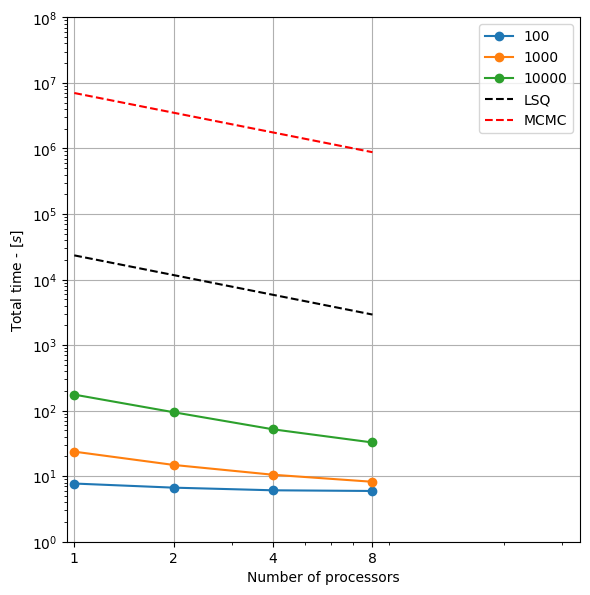

In [4]:
print("\n# Generating Timing Plots")
print("="*50)

# Generate comprehensive timing plots
ig.timing_plot(f_timing=timing_file)

print(f"Timing plots generated with prefix: {timing_file.split('.')[0]}")
print("Generated plots include:")
print("- Total execution time analysis")
print("- Forward modeling performance and speedup")
print("- Rejection sampling scaling analysis") 
print("- Posterior statistics performance")
print("- Cumulative time breakdowns")

## Medium Scale Timing Test

This example shows how to run a more comprehensive timing test with larger datasets.
Uncomment the code below to run a medium-scale test (takes longer to complete).

In [5]:
# Uncomment the block below for medium-scale timing test
"""
print("\n# Running Medium Scale Timing Test")
print("="*50)

# Define medium-scale test parameters  
N_arr_medium = [100, 500, 1000, 5000, 10000]  # Medium dataset sizes
Nproc_arr_medium = [1, 2, 4, 8]               # More processor counts

# Run timing computation
timing_file_medium = ig.timing_compute(N_arr=N_arr_medium, Nproc_arr=Nproc_arr_medium)

print(f"Medium-scale timing results saved to: {timing_file_medium}")

# Generate plots
ig.timing_plot(f_timing=timing_file_medium)
print(f"Medium-scale timing plots generated with prefix: {timing_file_medium.split('.')[0]}")
"""

'\nprint("\n# Running Medium Scale Timing Test")\nprint("="*50)\n\n# Define medium-scale test parameters  \nN_arr_medium = [100, 500, 1000, 5000, 10000]  # Medium dataset sizes\nNproc_arr_medium = [1, 2, 4, 8]               # More processor counts\n\n# Run timing computation\ntiming_file_medium = ig.timing_compute(N_arr=N_arr_medium, Nproc_arr=Nproc_arr_medium)\n\nprint(f"Medium-scale timing results saved to: {timing_file_medium}")\n\n# Generate plots\nig.timing_plot(f_timing=timing_file_medium)\nprint(f"Medium-scale timing plots generated with prefix: {timing_file_medium.split(\'.\')[0]}")\n'

## Full Scale Timing Test  

For production timing analysis, you can run the full test with the default parameters.
This will test a wide range of dataset sizes and all available processor counts.

In [6]:
# Uncomment the block below for full-scale timing test (takes significant time)
"""
print("\n# Running Full Scale Timing Test")
print("="*50)

# Run with default parameters (comprehensive test)
timing_file_full = ig.timing_compute()  # Uses default N_arr and Nproc_arr

print(f"Full-scale timing results saved to: {timing_file_full}")

# Generate comprehensive plots
ig.timing_plot(f_timing=timing_file_full)
print(f"Full-scale timing plots generated with prefix: {timing_file_full.split('.')[0]}")
"""

'\nprint("\n# Running Full Scale Timing Test")\nprint("="*50)\n\n# Run with default parameters (comprehensive test)\ntiming_file_full = ig.timing_compute()  # Uses default N_arr and Nproc_arr\n\nprint(f"Full-scale timing results saved to: {timing_file_full}")\n\n# Generate comprehensive plots\nig.timing_plot(f_timing=timing_file_full)\nprint(f"Full-scale timing plots generated with prefix: {timing_file_full.split(\'.\')[0]}")\n'

## Custom Timing Configuration

You can also customize the timing test for specific scenarios

In [7]:
print("\n# Example: Custom Timing Configuration")
print("="*50)

# Example: Focus on specific dataset sizes of interest
N_arr_custom = [1000, 5000, 10000]  # Focus on medium-large datasets
Nproc_arr_custom = [1, 4, 8]        # Test specific processor counts

print(f"Custom test configuration:")
print(f"Dataset sizes: {N_arr_custom}")  
print(f"Processor counts: {Nproc_arr_custom}")
print(f"This configuration tests {len(N_arr_custom)} × {len(Nproc_arr_custom)} = {len(N_arr_custom) * len(Nproc_arr_custom)} combinations")

# Uncomment to run custom timing test
"""
timing_file_custom = ig.timing_compute(N_arr=N_arr_custom, Nproc_arr=Nproc_arr_custom)
ig.timing_plot(f_timing=timing_file_custom)
print(f"Custom timing analysis complete: {timing_file_custom}")
"""


# Example: Custom Timing Configuration
Custom test configuration:
Dataset sizes: [1000, 5000, 10000]
Processor counts: [1, 4, 8]
This configuration tests 3 × 3 = 9 combinations


'\ntiming_file_custom = ig.timing_compute(N_arr=N_arr_custom, Nproc_arr=Nproc_arr_custom)\nig.timing_plot(f_timing=timing_file_custom)\nprint(f"Custom timing analysis complete: {timing_file_custom}")\n'

## Understanding Timing Results

The timing analysis provides insights into:

### Performance Scaling
- How execution time varies with dataset size
- Parallel efficiency across different processor counts
- Identification of computational bottlenecks

### Component Analysis  
- Relative time spent in each workflow component
- Which components benefit most from parallelization
- Memory vs compute-bound identification

### Comparison Baselines
- Performance relative to traditional least squares methods
- Comparison with MCMC sampling approaches
- Cost-benefit analysis of different configurations

### Optimization Guidance
- Optimal processor counts for different dataset sizes
- Sweet spots for price-performance ratios
- Scaling behavior for production deployments

## Tips for Timing Analysis

1. **Start Small**: Begin with quick tests using small N_arr and Nproc_arr
2. **System Warm-up**: First runs may be slower due to system initialization
3. **Resource Monitoring**: Monitor CPU, memory usage during large tests
4. **Reproducibility**: Results may vary between runs due to system load
5. **Hardware Specific**: Results are specific to your hardware configuration
6. **Baseline Comparison**: Compare with known reference systems when possible

print("\n# Timing Analysis Complete")
print("="*50)
print("Check the generated plots for detailed performance analysis.")
print("Timing data is saved in NPZ format for further analysis if needed.")